In [1]:
import networkx as nx
import sns

#import the gephi files
original = nx.read_graphml('Original.graphml')
final = nx.read_graphml('Final.graphml')

#find the number of nodes and edges in each graph
print("Original Graph")
print(original.number_of_nodes())
print(original.number_of_edges())

print("Final Graph")
print(final.number_of_nodes())
print(final.number_of_edges())

Original Graph
361
1065
Final Graph
204
551


In [2]:
#calculate the the network diameter for the final graph
nx.diameter(final)

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [8]:
largest_scc = max(nx.strongly_connected_components(final), key=len)
subgraph = final.subgraph(largest_scc)
diameter = nx.diameter(subgraph)
diameter

4

In [9]:
#calculate the average path length
nx.average_shortest_path_length(final)

NetworkXError: Graph is not strongly connected.

In [10]:
#calculate the average path length for the final graph using the largest strongly connected component
nx.average_shortest_path_length(subgraph)

2.466403162055336

In [11]:
#calculate the number of connected components
nx.number_connected_components(final)

NetworkXNotImplemented: not implemented for directed type

In [12]:
#calculate the number of strongly connected components
nx.number_strongly_connected_components(final)

176

In [13]:
#calculate the number of weakly connected components
nx.number_weakly_connected_components(final)

1

In [14]:
#calculate giant component
giant = max(nx.weakly_connected_components(final), key=len)
len(giant)

204

In [15]:
#calculate the component size distribution
import collections

components = nx.weakly_connected_components(final)
component_sizes = [len(c) for c in components]
counter = collections.Counter(component_sizes)
counter

Counter({204: 1})

In [16]:
#calculate the maximum degree 
sorted(dict(final.degree()).items(), key=lambda x: x[1], reverse=True)

[('UCq2jigrIGtupbTXiNjq6Wrw', 209),
 ('UCjekkqakBWqPu44aExSDxxA', 49),
 ('UCRWyPm7MrfotIYF8A8MGV3g', 36),
 ('UC7WDD6yHgzdqijHluCi1z-Q', 35),
 ('UChGcWDcAbCoRvCc3vaW1m2A', 35),
 ('UCE-f0sqi-H7kuLT0YiW9rcA', 26),
 ('UCO7dBj4bwaDOMoX-kKYF2Ww', 20),
 ('UCZRoNJu1OszFqABP8AuJIuw', 17),
 ('UCc0qpQO6y4aB4IaZtLCZMXg', 16),
 ('UC-91UA-Xy2Cvb98deRXuggA', 13),
 ('UCSdma21fnJzgmPodhC9SJ3g', 13),
 ('UC6idiEhlPEreqzCWfQ_GiLw', 13),
 ('UCXuqSBlHAE6Xw-yeJA0Tunw', 11),
 ('UC-lHJZR3Gqxm24_Vd_AJ5Yw', 11),
 ('UCq6VFHwMzcMXbuKyG7SQYIg', 10),
 ('UCJPUc1HICxQDa83muc3YFjA', 10),
 ('UCmb8hO2ilV9vRa8cilis88A', 10),
 ('UCrPseYLGpNygVi34QpGNqpA', 9),
 ('UCufmMfFTkZSi0sHWBhzz9yg', 9),
 ('UCsgv2QHkT2ljEixyulzOnUQ', 9),
 ('UCHTdZTK96KEndIIvRR6sCsQ', 9),
 ('UCgpRORu9JQFC_jtQeQ99hBA', 9),
 ('UCsvn_Po0SmunchJYOWpOxMg', 9),
 ('UCf8BuPKoB2xLIlVgqQfZgEw', 9),
 ('UCcKSEzhtEkzfCT8_DzyMfpg', 8),
 ('UC7dF9qfBMXrSlaaFFDvV_Yg', 8),
 ('UCMjlDOf0UO9wSijFqPE9wBw', 7),
 ('UCFQMnBA3CS502aghlcr0_aw', 7),
 ('UCuF49lP5gkkw5L8HK3H6GJg', 

In [17]:
#find the node with the maximum degree
final.nodes['UCq2jigrIGtupbTXiNjq6Wrw']

{'label': 'ZackRawrr',
 'isseed': 'yes',
 'seedrank': '1',
 'subscribercount': 424000,
 'videocount': 169,
 'viewcount(100s)': 328231,
 'country': 'not set',
 'daysactive': 5610,
 'Modularity Class': 5,
 'size': 50.0,
 'r': 198,
 'g': 134,
 'b': 233,
 'x': -1216.7535,
 'y': -586.93494}

In [18]:
#calculate the average degree
sum(dict(final.degree()).values()) / len(dict(final.degree()).values())

5.401960784313726

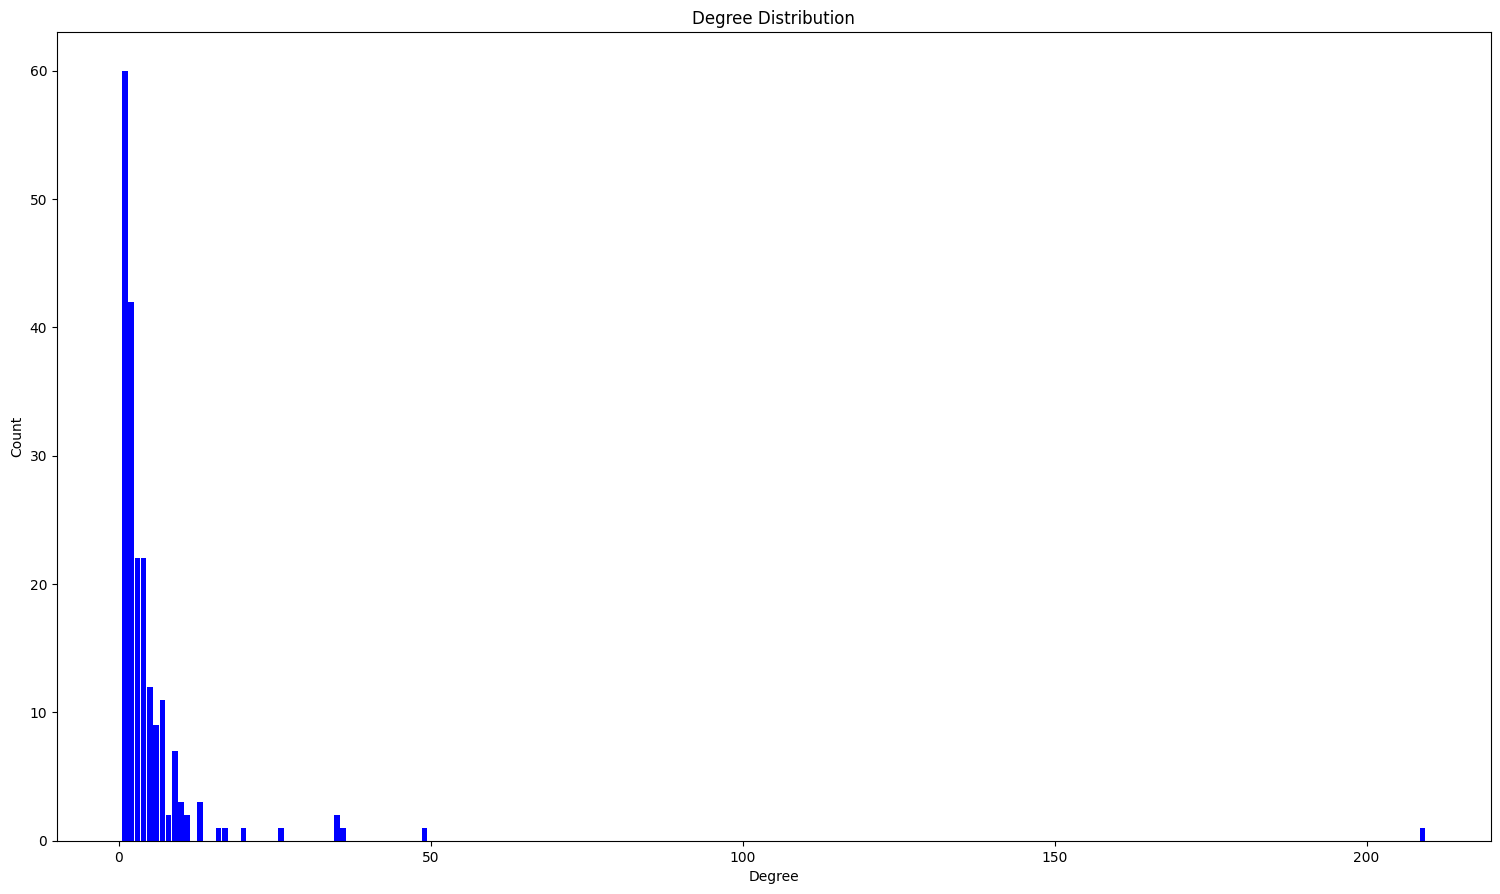

In [19]:
#calculate the degree distribution
import collections

degree_sequence = sorted([d for n, d in final.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

#Plot the degree distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.9, color='b')
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
#make the plot bigger
fig.set_size_inches(18.5, 10.5)

In [20]:
#find the top 10 nodes with the highest degree
top10_degree = sorted(dict(final.degree()).items(), key=lambda x: x[1], reverse=True)[:10]

#match the top 10 nodes with the original graph and print the labels and the degree
for i in top10_degree:
    print(final.nodes[i[0]]['label'], i[1])


ZackRawrr 209
Click4Gameplay 49
Josh Strife Hayes 36
The Act Man 35
Stoopzz 35
TheLazyPeon 26
Atozy 20
Logically Answered 17
Nintendo Prime 16
Joshua Fluke 13


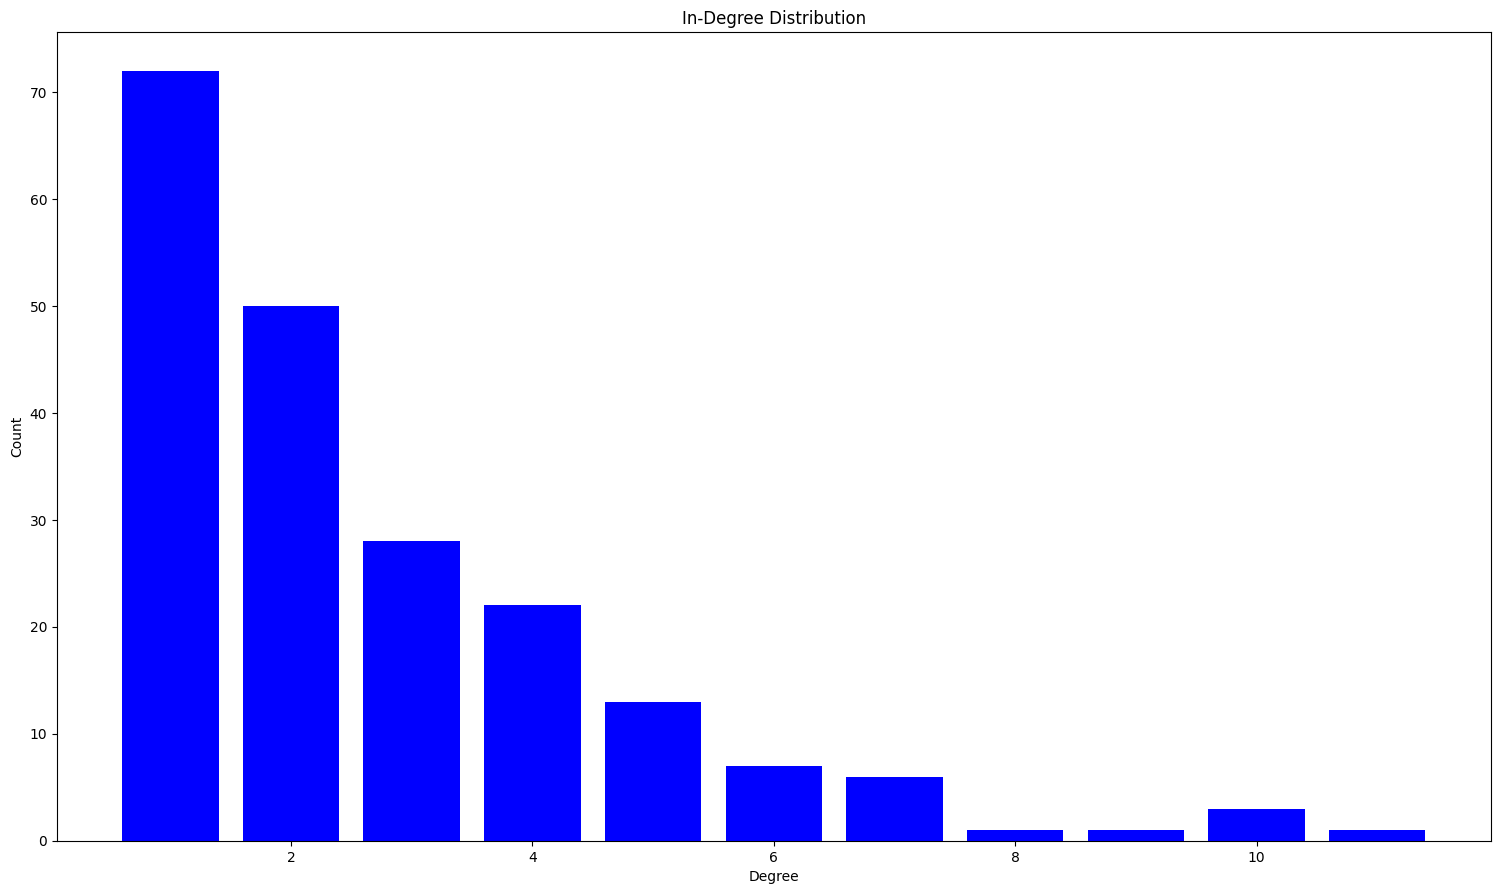

In [21]:
#Calculate the in-degree distribution
degree_sequence = sorted([d for n, d in final.in_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

#Plot the degree distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("In-Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
#make the plot bigger
fig.set_size_inches(18.5, 10.5)

In [22]:
#Find the top 10 nodes with the highest in-degree
top10_in_degree = sorted(dict(final.in_degree()).items(), key=lambda x: x[1], reverse=True)[:10]

#match the top 10 nodes with the original graph and print the labels and the in-degree
for i in top10_in_degree:
    print(final.nodes[i[0]]['label'], i[1])


PewDiePie 11
Linus Tech Tips 10
Josh Strife Hayes 10
penguinz0 10
videogamedunkey 9
Ludwig 8
Coffeezilla 7
SunnyV2 7
YongYea 7
Nixxiom 7


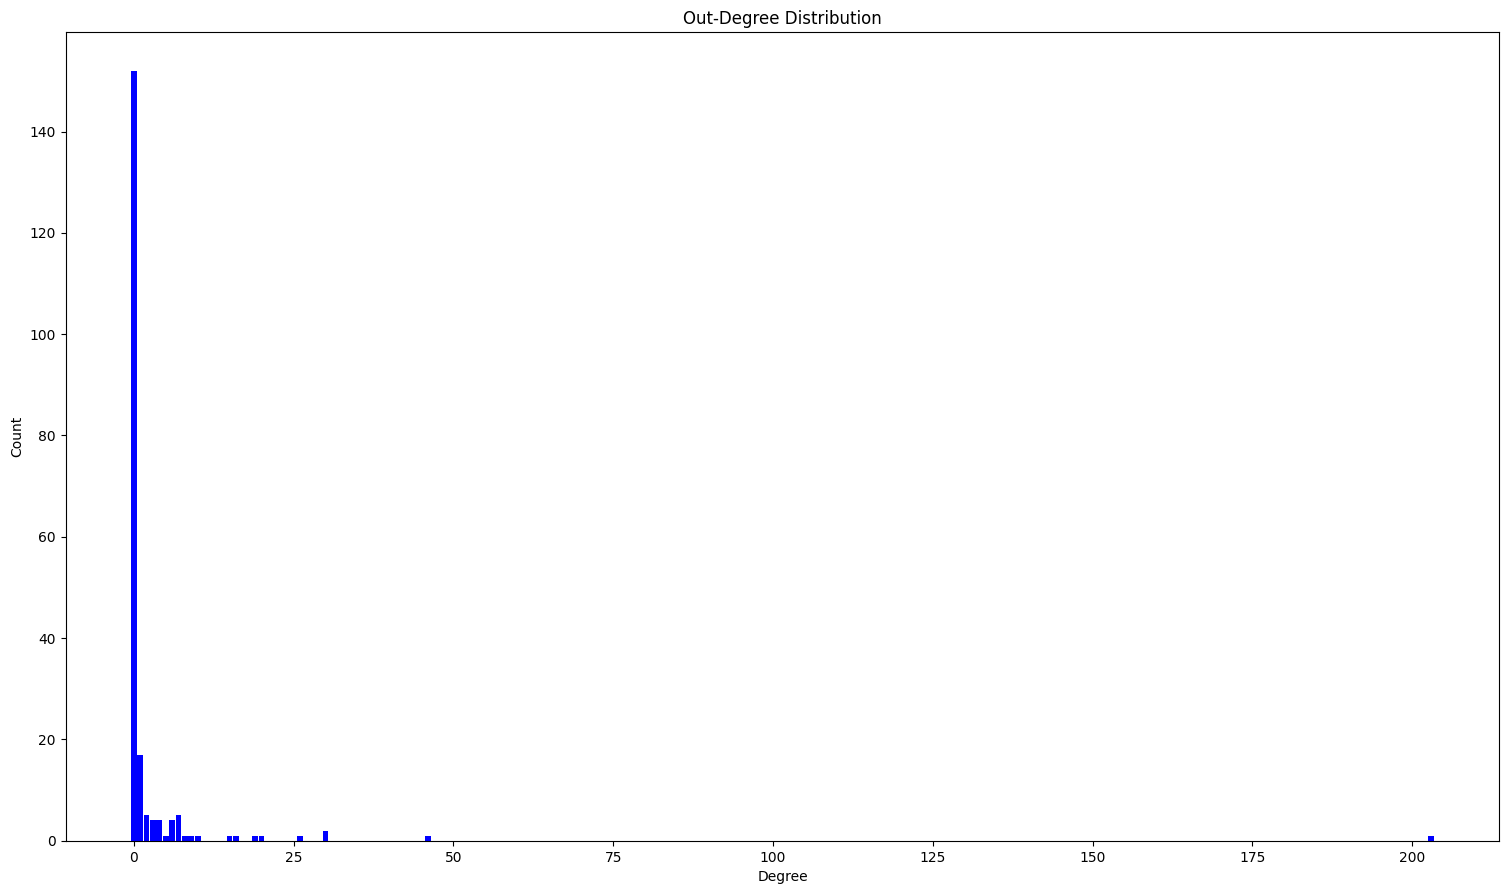

In [23]:
#Calculate the out-degree distribution
degree_sequence = sorted([d for n, d in final.out_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

#Plot the degree distribution 
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.9, color='b')
plt.title("Out-Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
#make the plot bigger
fig.set_size_inches(18.5, 10.5)

In [24]:
#Find the top 10 nodes with the highest out-degree
top10_out_degree = sorted(dict(final.out_degree()).items(), key=lambda x: x[1], reverse=True)[:10]

#match the top 10 nodes with the original graph and print the labels and the out-degree
for i in top10_out_degree:
    print(final.nodes[i[0]]['label'], i[1])

ZackRawrr 203
Click4Gameplay 46
The Act Man 30
Stoopzz 30
Josh Strife Hayes 26
TheLazyPeon 20
Atozy 19
Logically Answered 16
Nintendo Prime 15
Joshua Fluke 10


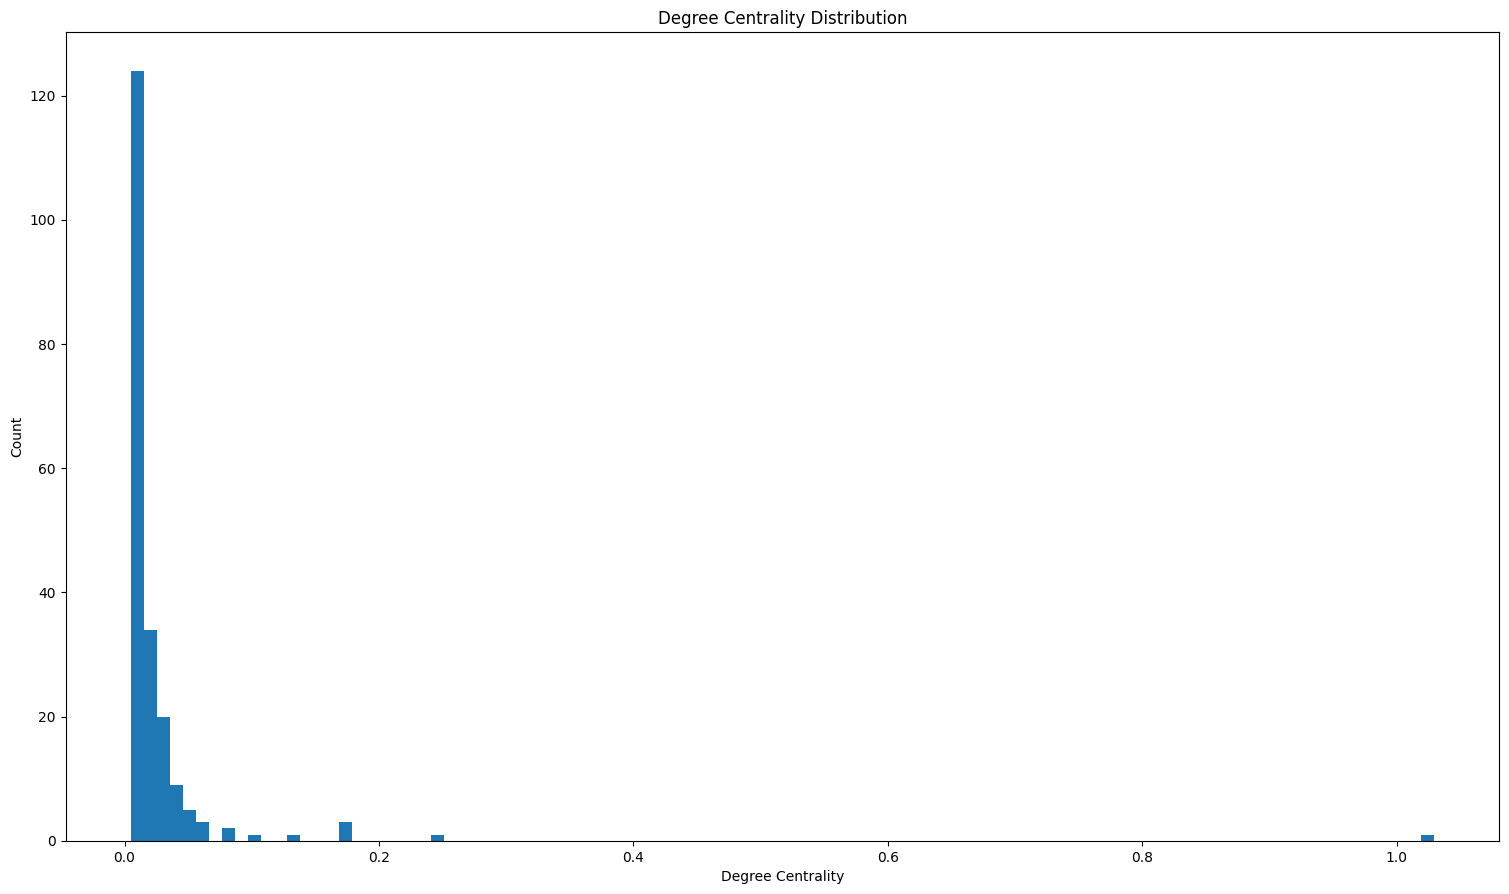

In [25]:
#calculate the centrality degree
centrality = nx.degree_centrality(final)
#plot the centrality degree distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.hist(centrality.values(), bins=100)
plt.title("Degree Centrality Distribution")
plt.ylabel("Count")
plt.xlabel("Degree Centrality")
#make the plot bigger
fig.set_size_inches(18.5, 10.5)

In [26]:
#show the labels labels of the nodes and their  degree centrality sorted in descending order and number them
counter = 0
for i in sorted(centrality.items(), key=lambda x: x[1], reverse=True):
    counter += 1
    print(counter, final.nodes[i[0]]['label'], i[1])


1 ZackRawrr 1.0295566502463054
2 Click4Gameplay 0.2413793103448276
3 Josh Strife Hayes 0.17733990147783252
4 The Act Man 0.1724137931034483
5 Stoopzz 0.1724137931034483
6 TheLazyPeon 0.12807881773399016
7 Atozy 0.09852216748768473
8 Logically Answered 0.08374384236453201
9 Nintendo Prime 0.07881773399014778
10 Joshua Fluke 0.06403940886699508
11 NakeyJakey 0.06403940886699508
12 Swifty 0.06403940886699508
13 Linus Tech Tips 0.054187192118226604
14 PewDiePie 0.054187192118226604
15 penguinz0 0.04926108374384237
16 Myndflame 0.04926108374384237
17 Thunderf00t 0.04926108374384237
18 Ludwig 0.04433497536945813
19 Xenosys Vex 0.04433497536945813
20 AngryJoeShow 0.04433497536945813
21 Ser Medieval 0.04433497536945813
22 OTK 0.04433497536945813
23 videogamedunkey 0.04433497536945813
24 Rextroy 0.04433497536945813
25 KiraTV 0.03940886699507389
26 Gigguk 0.03940886699507389
27 Modern History TV 0.034482758620689655
28 Coffeezilla 0.034482758620689655
29 SunnyV2 0.034482758620689655
30 YongYea 0

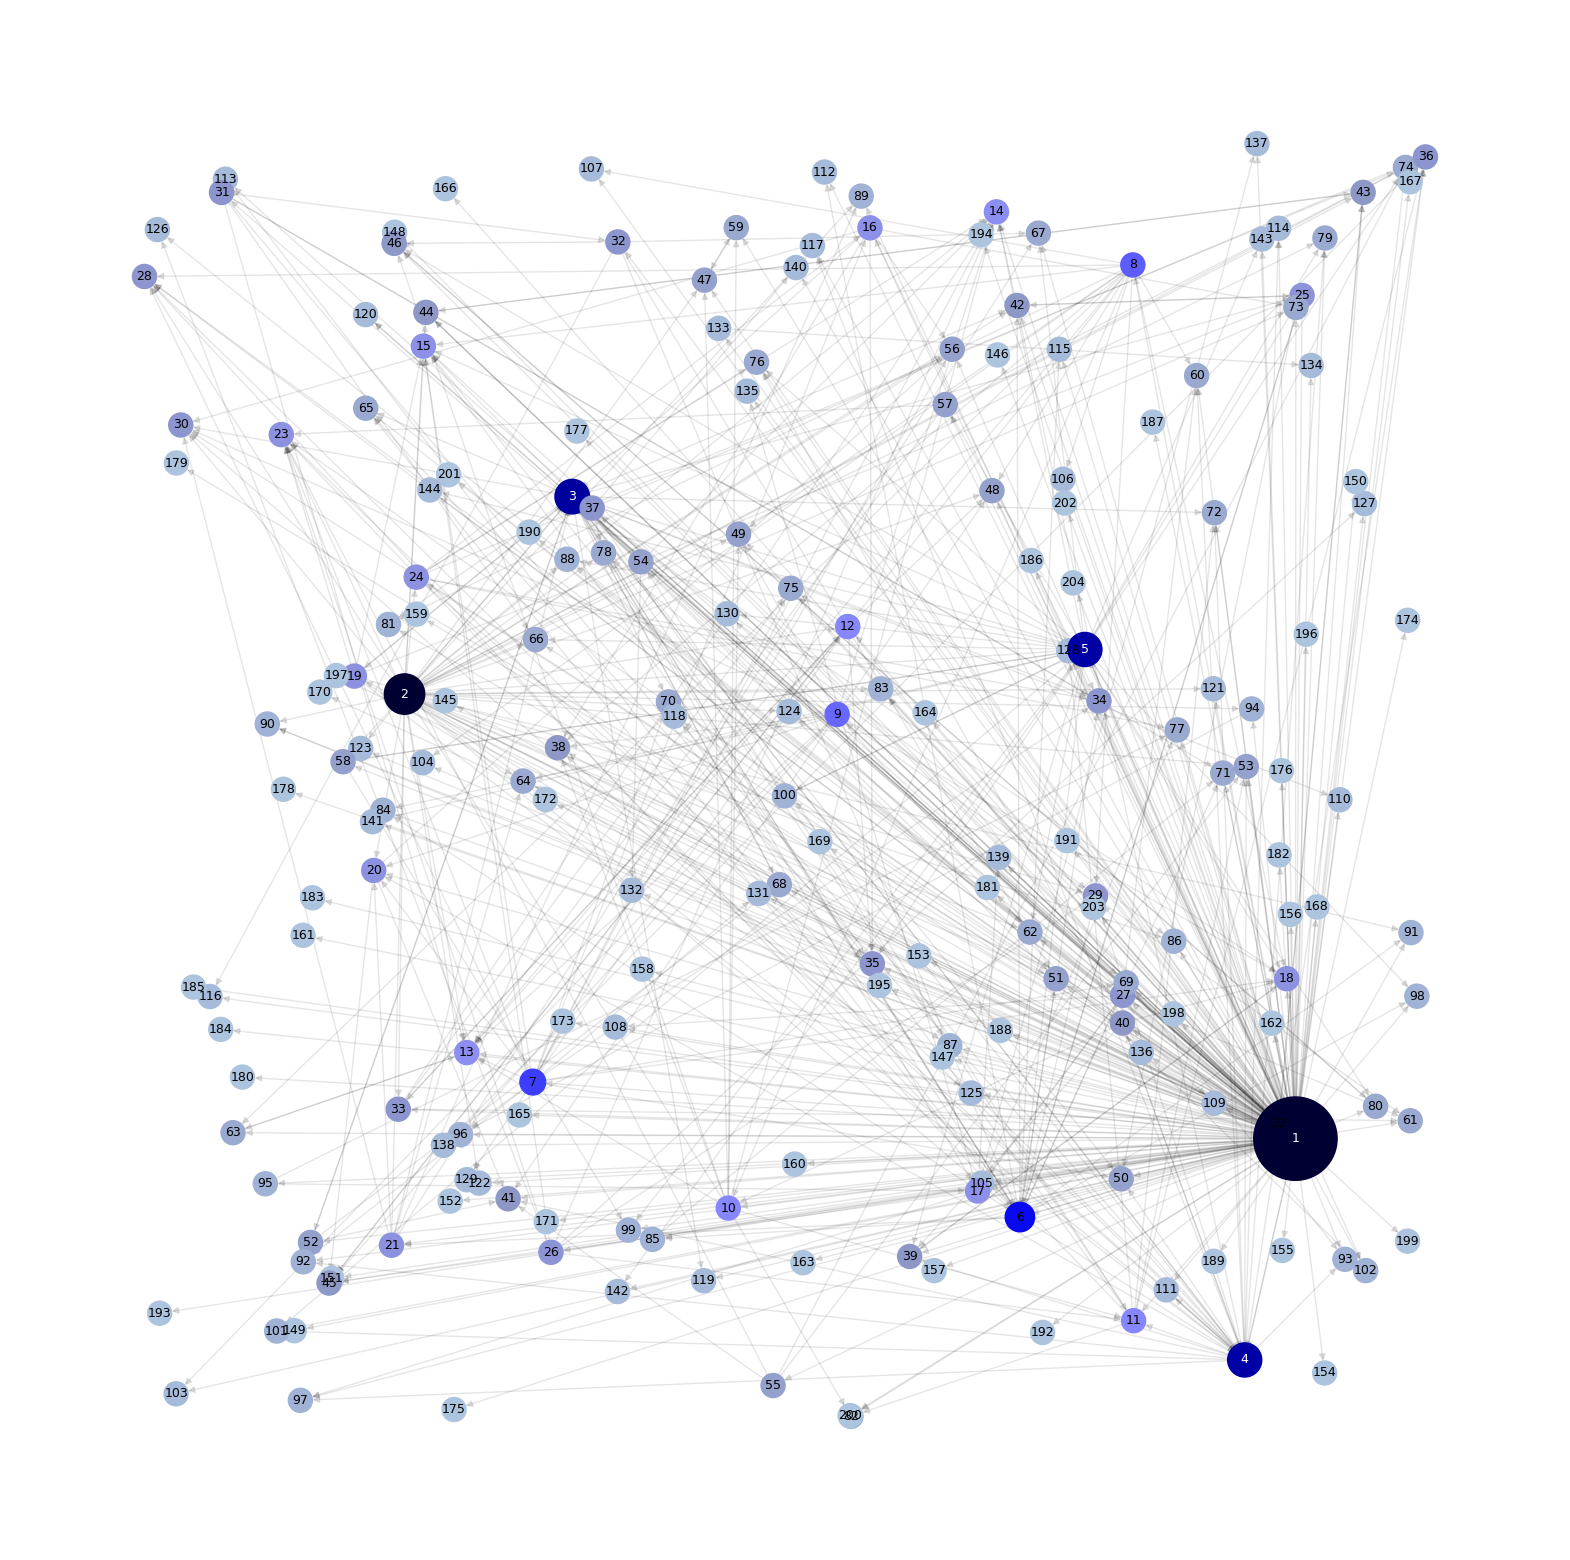

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Set the size of the plot
plt.figure(figsize=(20, 20))

# Set the random layout 
pos = nx.random_layout(final)

# Define a minimum node size
min_node_size = 300  # Adjust this value as needed

# Set the size of the nodes based on centrality with a minimum size
node_size = [max(v * 3500, min_node_size) for v in centrality.values()]

# Normalize centrality values
sorted_centrality = sorted(centrality.values(), reverse=True)
second_largest_centrality = sorted_centrality[1]
normalized_centrality = {node: min(centrality[node] / second_largest_centrality, 1.0) for node in final.nodes()}

# Create a custom blue color map with more shades
colors = ["#b3cde3", "#8c96c6", "#8c8cff", "#4c4cff", "#0c0cff", "#0000cc", "#000099", "#000066",
          "#000033"]  # Gradient of blues
cmap = LinearSegmentedColormap.from_list("custom_blue", colors, N=100)

# Map normalized centrality to the custom color map
node_color = [cmap(normalized_centrality[node]) for node in final.nodes()]

# Draw the nodes
nx.draw_networkx_nodes(final, pos, node_size=node_size, node_color=node_color)

# Draw the edges
nx.draw_networkx_edges(final, pos, edge_color='black', alpha=0.1)

# Identify top five nodes
top_five_nodes = sorted(centrality, key=centrality.get, reverse=True)[:5]

# Label the nodes based on their centrality value in descending order
channel_labels = {node: str(i) for i, node in enumerate(sorted(centrality, key=centrality.get, reverse=True), start=1)}

# Draw labels at the nodes' positions, make top 5 labels white
for node, label in channel_labels.items():
    if node in top_five_nodes:
        nx.draw_networkx_labels(final, pos, labels={node: label}, font_size=9, font_color='white',
                                font_family='sans-serif')
    else:
        nx.draw_networkx_labels(final, pos, labels={node: label}, font_size=9, font_family='sans-serif')

# Hide axis
plt.axis('off')

# Show the plot
plt.show()


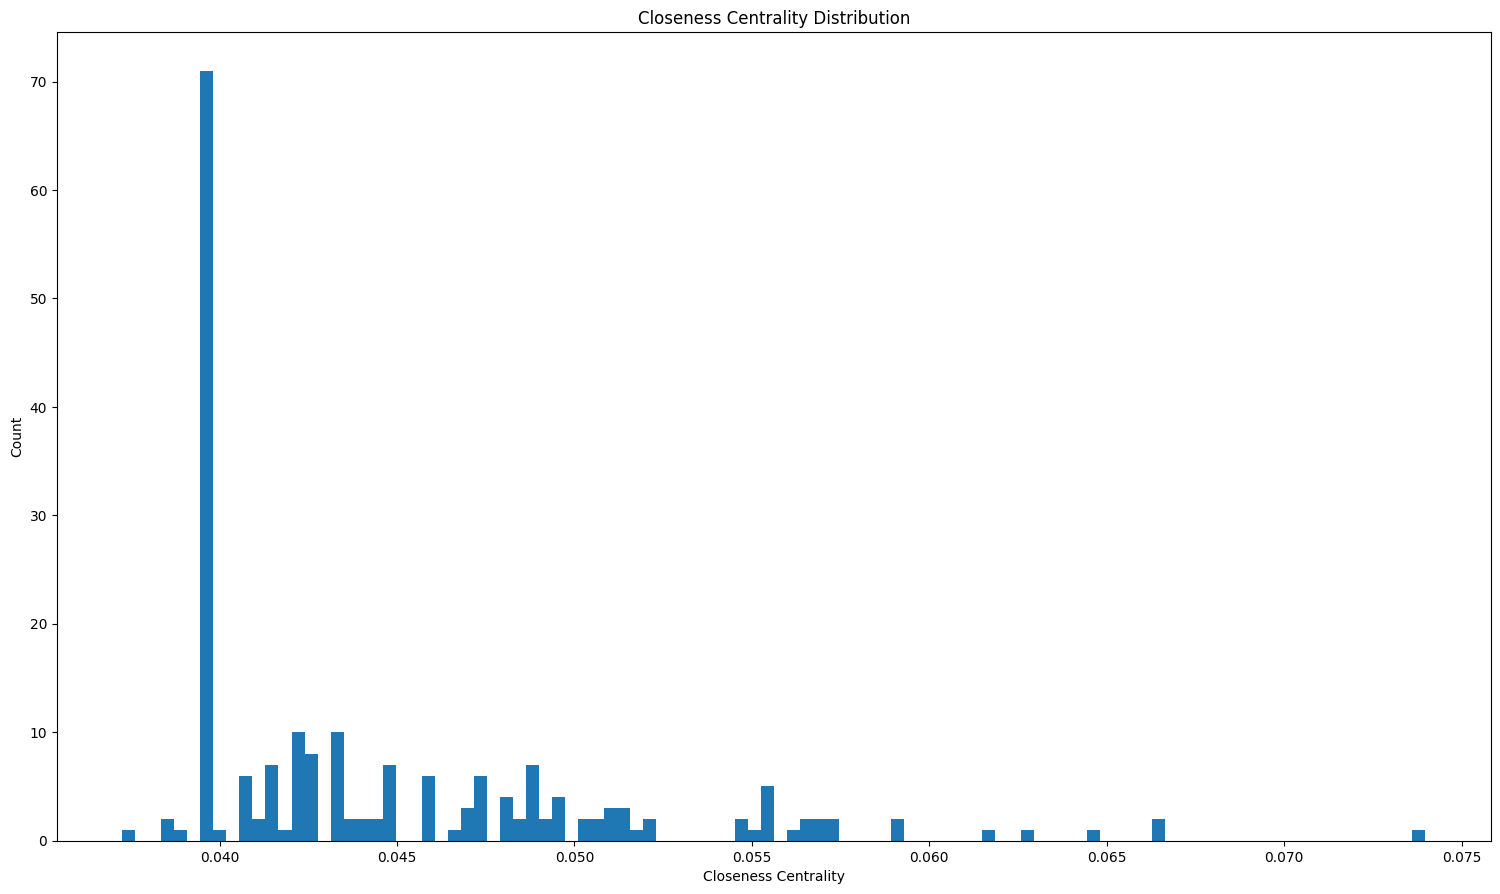

In [28]:
  #calculate the closeness centrality
#make the graph undirected

closeness = nx.closeness_centrality(final)

#plot the closeness centrality distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.hist(closeness.values(), bins=100)
plt.title("Closeness Centrality Distribution")
plt.ylabel("Count")
plt.xlabel("Closeness Centrality")
#make the plot bigger
fig.set_size_inches(18.5, 10.5)

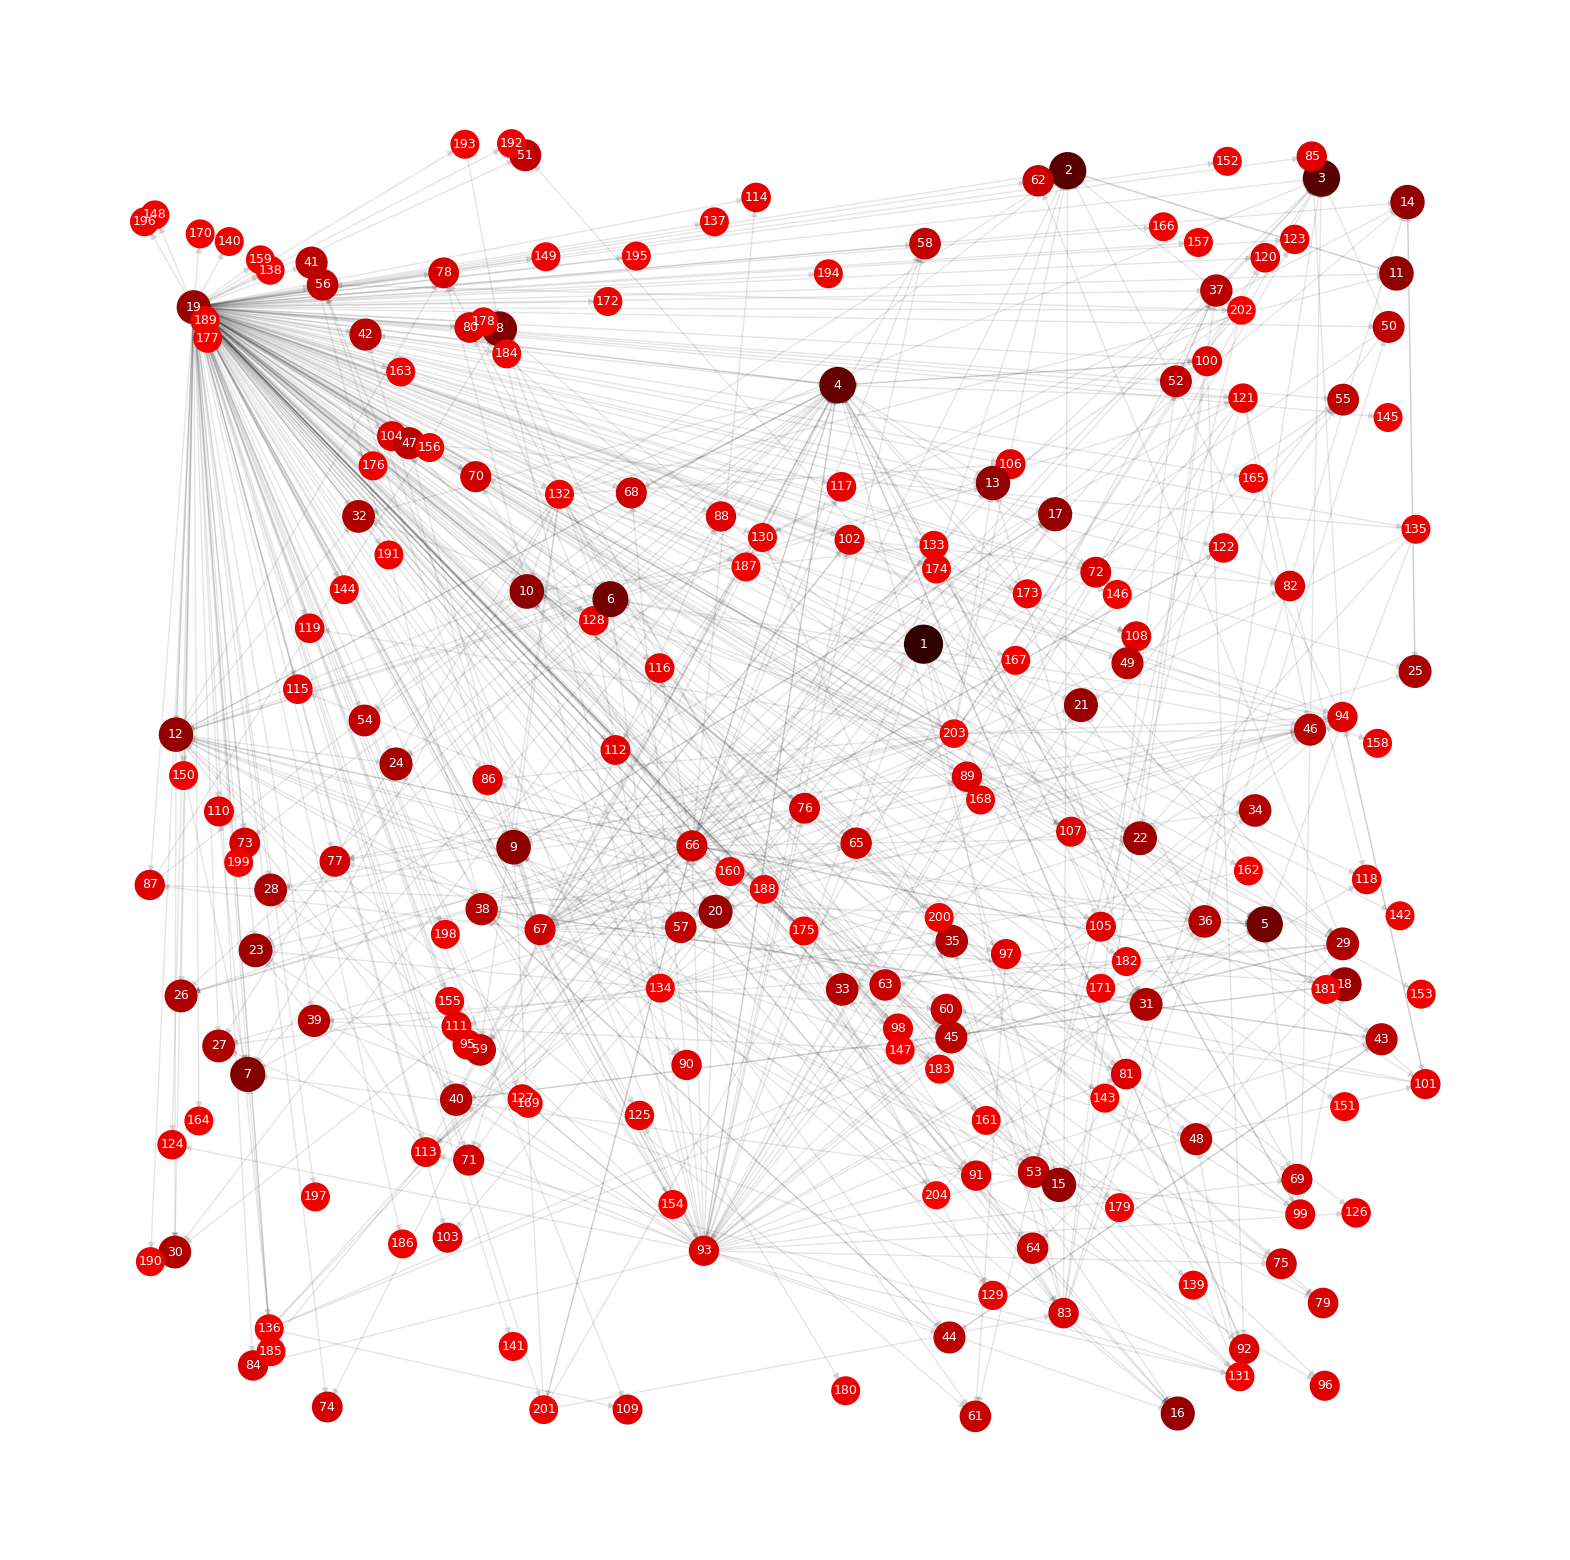

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Set the size of the plot
plt.figure(figsize=(20, 20))

# Set the random layout
pos = nx.random_layout(final)

# Define a minimum node size
min_node_size = 100  # Adjust this value as needed

# Set the size of the nodes based on centrality with a minimum size and make it more susceptible to change
node_size = [max(v * 10000, min_node_size) for v in closeness.values()]

# Normalize centrality values
sorted_closeness = sorted(closeness.values(), reverse=True)
largest_closeness = sorted_closeness[0]
normalized_closeness = {node: min(closeness[node] / largest_closeness, 1) for node in final.nodes()}

# Define a gradient of reds
red_colors = ["#ffcccc", "#ff9999", "#ff6666", "#ff3333", "#ff0000", "#cc0000", "#990000", "#660000", "#330000"]

# Create a custom red color map
cmap = LinearSegmentedColormap.from_list("custom_red", red_colors, N=100)

# Map normalized centrality to the custom color map
node_color = [cmap(normalized_closeness[node]) for node in final.nodes()]

# Draw the nodes
nx.draw_networkx_nodes(final, pos, node_size=node_size, node_color=node_color)

# Draw the edges
nx.draw_networkx_edges(final, pos, edge_color='black', alpha=0.1)

# Label the nodes based on their centrality value in descending order
channel_labels = {node: str(i) for i, node in enumerate(sorted(closeness, key=closeness.get, reverse=True), start=1)}

nx.draw_networkx_labels(final, pos, labels=channel_labels, font_size=9, font_color='white', font_family='sans-serif')

# Hide axis
plt.axis('off')

# Show the plot
plt.show()


In [30]:
#show the labels labels of the nodes and their closeness centrality sorted in descending order
counter = 0
for i in sorted(closeness.items(), key=lambda x: x[1], reverse=True):
    counter += 1
    print(counter, final.nodes[i[0]]['label'], i[1])

1 PewDiePie 0.07397959183673469
2 Linus Tech Tips 0.06658739595719382
3 penguinz0 0.06658739595719382
4 Josh Strife Hayes 0.06443882305951272
5 videogamedunkey 0.06277056277056277
6 boogie2988 0.06183368869936033
7 SunnyV2 0.05920803334596438
8 VaatiVidya 0.05918367346938776
9 Ludwig 0.05741464243247835
10 Coffeezilla 0.05741464243247835
11 ShortCircuit 0.056795131845841784
12 TheLazyPeon 0.05676753460004692
13 Nixxiom 0.05665024630541872
14 Bellular Warcraft 0.056441512899724475
15 Karl Jobst 0.056111453201970446
16 Mark Rober 0.055500821018062405
17 Mogul Mail 0.055500821018062405
18 KiraTV 0.05544735937679002
19 ZackRawrr 0.05544735937679002
20 World of Warcraft 0.055444921915941726
21 Skill Up 0.05517241379310345
22 Jim Sterling 0.05459097149317613
23 YongYea 0.054566123531640774
24 MitchManix 0.052118226600985224
25 Bellular News 0.0520320197044335
26 SomeOrdinaryGamers 0.051589789520824
27 Mrwhosetheboss 0.051313628899835796
28 Jesse Cox 0.051313628899835796
29 Thunderf00t 0.0513

In [31]:
#calculate the betweenness centrality

betweenness = nx.betweenness_centrality(final)

#plot the betweenness centrality distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.hist(betweenness.values(), bins=100)
plt.title("Betweenness Centrality Distribution")
plt.ylabel("Count")
plt.xlabel("Betweenness Centrality")

#make the plot bigger
fig.set_size_inches(18.5, 10.5)

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Set the size of the plot
plt.figure(figsize=(20, 20))

# Set the random layout 
pos = nx.random_layout(final)

# Define a minimum node size
min_node_size = 300  # Adjust this value as needed

# Set the size of the nodes based on centrality with a minimum size
node_size = [max(v * 50000, min_node_size) for v in betweenness.values()]

# Normalize centrality values
sorted_centrality = sorted(betweenness.values(), reverse=True)
largest_betweeness = sorted_centrality[0]
normalized_centrality = {node: min(betweenness[node] / largest_betweeness, 1.0) for node in final.nodes()}

from matplotlib.colors import LinearSegmentedColormap

# Create a custom brown color map with a gradient from lighter to darker shades
light_to_dark_brown_colors = ["#d2b48c", "#8b4513", "#804000", "#6b4423", "#553000", "#3d2000",
                              "#291800"]  # Gradient of browns
light_to_dark_brown_cmap = LinearSegmentedColormap.from_list("custom_light_to_dark_brown", light_to_dark_brown_colors,
                                                             N=100)

# Map normalized centrality to the custom darker green color map
node_color = [light_to_dark_brown_cmap(normalized_centrality[node]) for node in final.nodes()]

# Draw the nodes
nx.draw_networkx_nodes(final, pos, node_size=node_size, node_color=node_color)

# Draw the edges
nx.draw_networkx_edges(final, pos, edge_color='black', alpha=0.1)

# Identify top five nodes
top_five_nodes = sorted(betweenness, key=betweenness.get, reverse=True)[:4]

# Label the nodes based on their centrality value in descending order
channel_labels = {node: str(i) for i, node in
                  enumerate(sorted(betweenness, key=betweenness.get, reverse=True), start=1)}

# Draw labels at the nodes' positions, make top 5 labels white
for node, label in channel_labels.items():
    if node in top_five_nodes:
        nx.draw_networkx_labels(final, pos, labels={node: label}, font_size=9, font_color='white',
                                font_family='sans-serif')
    else:
        nx.draw_networkx_labels(final, pos, labels={node: label}, font_size=9, font_family='sans-serif')

# Hide axis
plt.axis('off')

# Show the plot
plt.show()

In [33]:
#show the labels labels of the nodes and their betweenness centrality sorted in descending order
counter = 0
for i in sorted(betweenness.items(), key=lambda x: x[1], reverse=True):
    counter += 1
    print(counter, final.nodes[i[0]]['label'], i[1])

1 ZackRawrr 0.08032848851387604
2 Josh Strife Hayes 0.02860719569493897
3 Stoopzz 0.021425726316474016
4 TheLazyPeon 0.02101806239737274
5 The Act Man 0.008485343608252453
6 Swifty 0.007047342665301015
7 Myndflame 0.007042871774862219
8 KiraTV 0.0050334097449153785
9 Click4Gameplay 0.004990326618868784
10 The Comeback Kids 0.004779788323659952
11 NakeyJakey 0.000715342470207612
12 Thunderf00t 0.000714123136451576
13 Joshua Fluke 0.0005771513111902323
14 Ser Medieval 0.00030076899315547315
15 OTK 0.000215415630232974
16 Linus Tech Tips 0.00020322229267261704
17 AngryJoeShow 0.00019915784681916472
18 Preach Gaming 0.0001633907233087841
19 Xenosys Vex 0.00012193337560357022
20 LongBeachGriffy 0.00012193337560357022
21 Bellular Warcraft 0.0001097400380432132
22 Ludwig 8.535336292249915e-05
23 swiftyirl 7.519224828886829e-05
24 Rextroy 7.316002536214213e-05
25 Atrioc 3.454778975434489e-05
26 Tolarian Community College 3.251556682761872e-05
27 Modern Vintage Gamer 3.0483343900892555e-05
28 C

In [34]:
#calculate the eigenvector centrality
eigenvector = nx.eigenvector_centrality(final)

In [35]:
#plot the eigenvector centrality distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.hist(eigenvector.values(), bins=100)
plt.title("Eigenvector Centrality Distribution")
plt.ylabel("Count")

#make the plot bigger
fig.set_size_inches(18.5, 10.5)

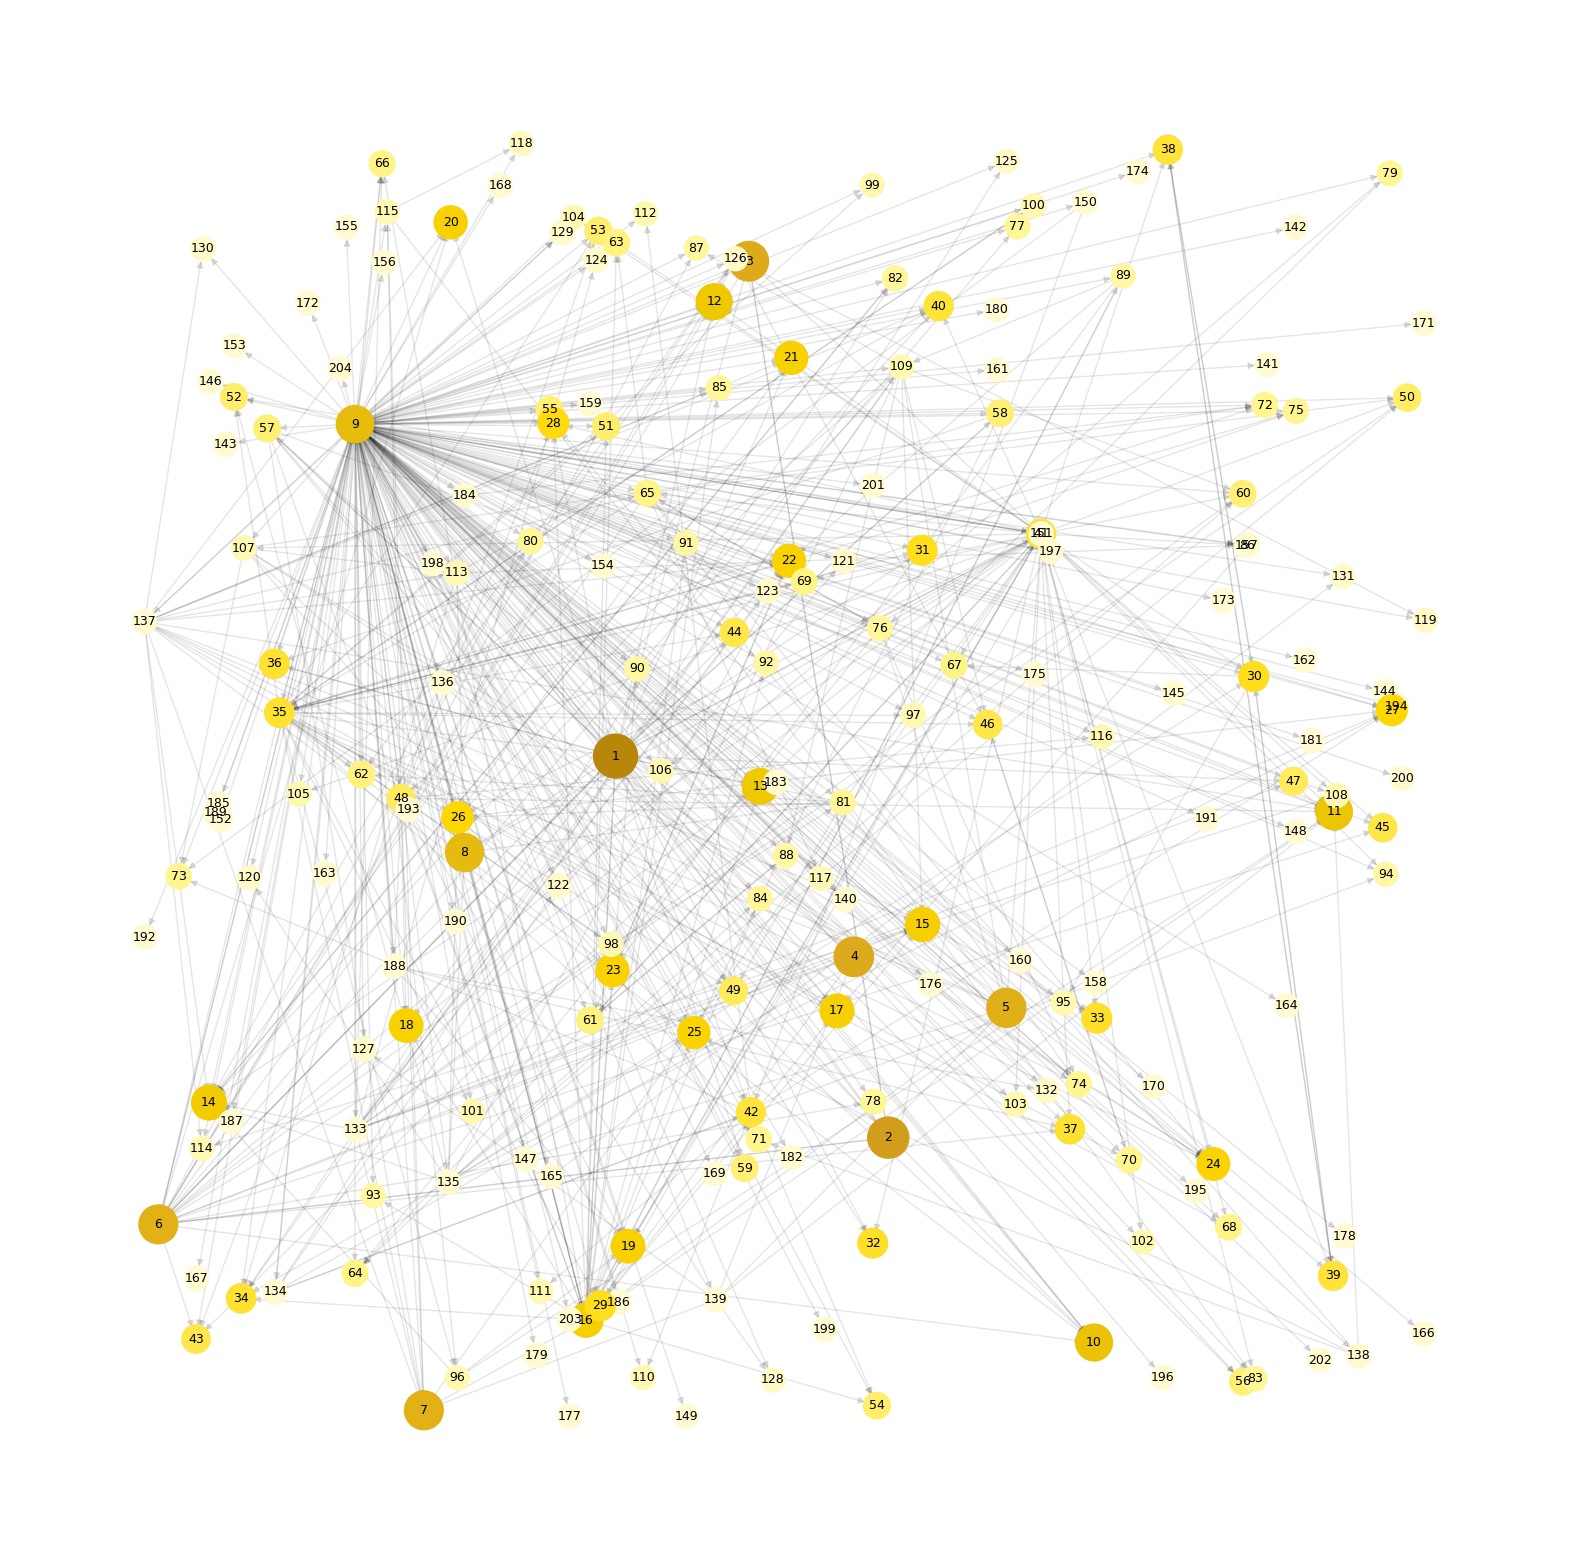

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Set the size of the plot
plt.figure(figsize=(20, 20))

# Set the random layout 
pos = nx.random_layout(final)

# Define a minimum node size
min_node_size = 300  # Adjust this value as needed

# Set the size of the nodes based on centrality with a minimum size
node_size = [max(v * 5000, min_node_size) for v in eigenvector.values()]

# Normalize centrality values
sorted_centrality = sorted(eigenvector.values(), reverse=True)
largest_eigenvector = sorted_centrality[0]
normalized_centrality = {node: min(eigenvector[node] / largest_eigenvector, 1.0) for node in final.nodes()}

# Create a custom yellow color map with a gradient from lighter to darker shades
light_to_dark_yellow_colors = ["#ffffe0", "#fffacd", "#fff68f", "#ffd700", "#eec900", "#daa520",
                               "#b8860b"]  # Gradient of yellows
light_to_dark_yellow_cmap = LinearSegmentedColormap.from_list("custom_light_to_dark_yellow",
                                                              light_to_dark_yellow_colors, N=100)

# Map normalized centrality to the custom darker green color map
node_color = [light_to_dark_yellow_cmap(normalized_centrality[node]) for node in final.nodes()]

# Draw the nodes
nx.draw_networkx_nodes(final, pos, node_size=node_size, node_color=node_color)

# Draw the edges
nx.draw_networkx_edges(final, pos, edge_color='black', alpha=0.1)

# Identify top five nodes
top_five_nodes = sorted(eigenvector, key=eigenvector.get, reverse=True)[:4]

# Label the nodes based on their centrality value in descending order
channel_labels = {node: str(i) for i, node in
                  enumerate(sorted(eigenvector, key=eigenvector.get, reverse=True), start=1)}

# Draw labels at the nodes' positions
nx.draw_networkx_labels(final, pos, labels=channel_labels, font_size=9, font_family='sans-serif')

# Hide axis
plt.axis('off')

# Show the plot
plt.show()

In [37]:
#find the labels of the nodes and their eigenvector centrality sorted in descending order
counter = 0
for i in sorted(eigenvector.items(), key=lambda x: x[1], reverse=True):
    counter += 1
    print(counter, final.nodes[i[0]]['label'], i[1])

1 Josh Strife Hayes 0.2000061971914833
2 KiraTV 0.1750689817142868
3 Kira 0.16187630981119946
4 SunnyV2 0.16016041467593112
5 PewDiePie 0.15746117220249695
6 TheLazyPeon 0.1556091140816621
7 penguinz0 0.15545488427085868
8 YongYea 0.1471364060720851
9 ZackRawrr 0.14465758213329716
10 Nixxiom 0.13988685147616348
11 videogamedunkey 0.13700409319804757
12 MitchManix 0.13260310481442106
13 The Critical Drinker 0.13155696218689672
14 Linus Tech Tips 0.12447540510328928
15 Coffeezilla 0.11909405410039343
16 The Act Man 0.11908662752285384
17 SomeOrdinaryGamers 0.1176232024283265
18 Karl Jobst 0.11539332488962598
19 VaatiVidya 0.11492724480689756
20 Upper Echelon 0.11278897153097028
21 Philion 0.11278897153097028
22 Ludwig 0.11105221389644869
23 Mogul Mail 0.11038279604547344
24 World of Warcraft 0.10983328916711646
25 Jim Sterling 0.10608802545580115
26 AngryJoeShow 0.10104953226143204
27 boogie2988 0.09827435843161783
28 Skill Up 0.09786481102776157
29 Zizaran 0.09332172168185301
30 OTK 0.0

In [38]:
#calculate the average clustering coefficient
nx.average_clustering(final)

0.3564744367107534

In [39]:
import pandas as pd

#Finding triangles and sorting nodes within each cycle
triangles = list(nx.simple_cycles(final, length_bound=3))
triangles = [sorted(cycle, key=lambda x: final.nodes[x]['label']) for cycle in triangles if len(cycle) == 3]

#Remove duplicate triangles
triangles = list(set(tuple(cycle) for cycle in triangles))

#Create a dataframe to display the triangles with node labels
triangles_df = pd.DataFrame([tuple(final.nodes[node]['label'] for node in triangle) for triangle in triangles],
                            columns=['Node 1', 'Node 2', 'Node 3'])
triangles_df

Node 1                      Node 2                      Node 3
0   The Comeback Kids                 TheLazyPeon                   ZackRawrr
1      Click4Gameplay                 TheLazyPeon                   ZackRawrr
2      Click4Gameplay                 The Act Man                   ZackRawrr
3   Josh Strife Hayes            Josh Strife Says                   ZackRawrr
4      Click4Gameplay           Josh Strife Hayes                   ZackRawrr
5   Josh Strife Hayes                     Stoopzz                   ZackRawrr
6   Josh Strife Hayes                 Xenosys Vex                   ZackRawrr
7      Click4Gameplay                     Stoopzz                   ZackRawrr
8   Josh Strife Hayes                      KiraTV                 TheLazyPeon
9      Click4Gameplay           Josh Strife Hayes                 The Act Man
10             KiraTV                 TheLazyPeon                   ZackRawrr
11  Josh Strife Hayes                Ser Medieval                 TheLazyPeon
12               Kira                      KiraTV                 TheLazyPeon
13             Atrioc                 The Act Man                   ZackRawrr
14                ATK                     Stoopzz                   ZackRawrr
15     Click4Gameplay                Ser Medieval                 TheLazyPeon
16        The Act Man                 Xenosys Vex                   ZackRawrr
17            Stoopzz                 TheLazyPeon                   ZackRawrr
18  Josh Strife Hayes  Tolarian Community College                   ZackRawrr
19     Click4Gameplay           Josh Strife Hayes                 TheLazyPeon
20  Josh Strife Hayes            Josh Strife Says  Tolarian Community College
21              Emiru                         OTK      Steak and Eggs Podcast
22            Stoopzz                      Swifty                   ZackRawrr
23              Savix                     Stoopzz                   ZackRawrr
24     Click4Gameplay           Josh Strife Hayes                     Stoopzz
25  Josh Strife Hayes                   Myndflame                   ZackRawrr
26  Josh Strife Hayes                 The Act Man                 Xenosys Vex
27  Josh Strife Hayes                Ser Medieval                   ZackRawrr
28  Josh Strife Hayes                 TheLazyPeon                   ZackRawrr
29     Click4Gameplay                Ser Medieval                   ZackRawrr
30  Josh Strife Hayes                 The Act Man                   ZackRawrr

In [40]:
#calculate transitivity
nx.transitivity(final)

0.01423194045000846

In [41]:
#make final graph undirected
final_undirected = final.to_undirected()

nx.has_bridges(final_undirected)

True

In [42]:
#show the label of each node that corresponds to the node id
for i in list(nx.clustering(final)):
    print(final.nodes[i[0]]['label'], i[1])

KeyError: 'U'

In [ ]:
#calculate the  clustetering coefficient distribution
clustering = nx.clustering(final)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.hist(clustering.values(), bins=100)
plt.title("Clustering Coefficient Distribution")
plt.ylabel("Count")
plt.xlabel("Clustering Coefficient")
#make the plot bigger
fig.set_size_inches(18.5, 10.5)

In [ ]:
#show the labels labels of the nodes and their clustering coefficient sorted in descending order
counter = 0
for i in sorted(clustering.items(), key=lambda x: x[1], reverse=True):
    counter += 1
    print(counter, final.nodes[i[0]]['label'], i[1])

In [ ]:
#calculate the triadic closure
nx.transitivity(final)

In [ ]:
list(nx.bridges(final_undirected))
#show the label of each node that corresponds to the node id
for i in list(nx.bridges(final_undirected)):
    print(final.nodes[i[0]]['label'], final.nodes[i[1]]['label'])

In [ ]:
#find the local bridges
len(list(nx.local_bridges(final_undirected)))

In [ ]:
for i in list(nx.local_bridges(final_undirected)):
    print(final.nodes[i[0]]['label'], final.nodes[i[1]]['label'], i[2])

In [ ]:
# Find bridges and local bridges
bridges = set(nx.bridges(final_undirected))
local_bridges = set(nx.local_bridges(final_undirected, with_span=False))  # with_span=False to get edges only

# Check if they are the same
are_same = bridges == local_bridges

# Find differences
bridges_not_local = bridges - local_bridges  # Bridges that are not local bridges
local_not_bridges = local_bridges - bridges  # Local bridges that are not bridges

# Output results
print("Are bridges and local bridges the same:", are_same)
print("Bridges that are not local bridges:", bridges_not_local)
print("Local bridges that are not bridges:", local_not_bridges)

In [ ]:
#Calculate graph density
nx.density(final)

In [ ]:
#calculate the accortivity with in degree
nx.degree_assortativity_coefficient(final, x='in', y='in')

In [ ]:
#calculate the accortivity with video views
nx.attribute_assortativity_coefficient(final, 'viewcount(100s)')

In [ ]:
#calculate the assortativity with all attributes

as_subcount = nx.attribute_assortativity_coefficient(final, 'subscribercount')

as_videocount = nx.attribute_assortativity_coefficient(final, 'videocount')

as_viewcount = nx.attribute_assortativity_coefficient(final, 'viewcount(100s)')

as_country = nx.attribute_assortativity_coefficient(final, 'country')

as_publ = nx.attribute_assortativity_coefficient(final, 'daysactive')

print("Subscriber Count Assortativity:", as_subcount)
print("Video Count Assortativity:", as_videocount)
print("View Count Assortativity:", as_viewcount)
print("Country Assortativity:", as_country)
print("Days Active Assortativity:", as_publ)

In [ ]:
#calculate the assortativity for all degrees

as_in = nx.degree_assortativity_coefficient(final, x='in', y='in')

as_out = nx.degree_assortativity_coefficient(final, x='out', y='out')

as_out_in = nx.degree_assortativity_coefficient(final, x='out', y='in')

as_in_out = nx.degree_assortativity_coefficient(final, x='in', y='out')

print("In-Degree Assortativity:", as_in)
print("Out-Degree Assortativity:", as_out)
print("Out-In-Degree Assortativity:", as_out_in)
print("In-Out-Degree Assortativity:", as_in_out)

In [ ]:
#calculate homophily based on the number of cross-country edges
import pandas as pd

# Create a dataframe with the country of each node
country_df = pd.DataFrame([final.nodes[node]['country'] for node in final.nodes()], columns=['country'])

# Calculate the number of cross-country edges
cross_country_edges = len([edge for edge in final.edges() if final.nodes[edge[0]]['country'] != final.nodes[edge[1]][
    'country']])

#calculate the total number of edges
total_edges = final.number_of_edges()

# Calculate the homophily
homophily = 1 - (cross_country_edges / total_edges)

# Output the results
print("Number of cross-country edges:", cross_country_edges)
print("Number of edges:", total_edges)
print("Homophily:", homophily)

In [ ]:
p = sum(1 for node, attr in final.nodes(data=True) if attr.get('country') == 'CA') / final.number_of_nodes()
q = 1 - p
expected_cross_edges = int(2 * p * q * total_edges)

# Calculate the actual number of cross-edges for us
actual_cross_edges = sum(1 for u, v in final.edges() if final.nodes[u]['country'] != final.nodes[v]['country'])

# Implement the homophily measure
homophily = actual_cross_edges < expected_cross_edges

print(f'Expected number of cross-edges: {expected_cross_edges}')
print(f'Actual number of cross-edges: {actual_cross_edges}')
print(f'Evidence of homophily in CA nodes: {homophily}')

In [ ]:
#calculate the homophily based on the number of cross-subscription edges
import pandas as pd

# Create a dataframe with the subAscriber count of each node
sub_df = pd.DataFrame({'subscribercount': [final.nodes[node]['subscribercount'] for node in final.nodes()]})

# Define thresholds for low, mid, and high subscriber counts
low_threshold = 1000000
high_threshold = 10000000

# Categorize subscriber counts
def categorize_subscriber_count(count):
    if count <= low_threshold:
        return 'low'
    elif count <= high_threshold:
        return 'mid'
    else:
        return 'high'

# Add the category to each node in the graph
for node in final.nodes():
    final.nodes[node]['category_sub'] = categorize_subscriber_count(final.nodes[node]['subscribercount'])

# Calculate the number of cross-category edges
cross_sub_edges = len([edge for edge in final.edges() if final.nodes[edge[0]]['category_sub'] != final.nodes[edge[1]]['category_sub']])

# Calculate the total number of edges
total_edges = final.number_of_edges()

# Calculate the homophily
homophily = 1 - (cross_sub_edges / total_edges)

# Output the results
print("Number of cross-sub edges:", cross_sub_edges)
print("Number of edges:", total_edges)
print("Homophily:", homophily)

In [ ]:
p = sum(1 for node, attr in final.nodes(data=True) if attr.get('category_sub') == 'low') / final.number_of_nodes()
q = 1 - p
expected_cross_edges = 2 * p * q * total_edges

# Calculate the actual number of cross-edges
actual_cross_edges = sum(1 for u, v in final.edges() if final.nodes[u]['category_sub'] != final.nodes[v]['category_sub'])

# Implement the homophily measure
homophily = actual_cross_edges < expected_cross_edges

print(f'Expected number of cross-edges: {expected_cross_edges}')
print(f'Actual number of cross-edges: {actual_cross_edges}')
print(f'Evidence of homophily: {homophily}')

In [ ]:
#calculate the homophily based on the number of cross-video edges
import pandas as pd

# Create a dataframe with the subscriber count of each node
video_df = pd.DataFrame({'videocount': [final.nodes[node]['videocount'] for node in final.nodes()]})

# Define thresholds for low, mid, and high subscriber counts
low_threshold = 300
high_threshold = 1000

# Categorize subscriber counts
def categorize_videos_count(count):
    if count <= low_threshold:
        return 'low'
    elif count <= high_threshold:
        return 'mid'
    else:
        return 'high'

# Add the category to each node in the graph
for node in final.nodes():
    final.nodes[node]['category_video'] = categorize_videos_count(final.nodes[node]['videocount'])

# Calculate the number of cross-category edges
cross_category_edges = len([edge for edge in final.edges() if final.nodes[edge[0]]['category_video'] != final.nodes[edge[1]]['category_video']])

# Calculate the total number of edges
total_edges = final.number_of_edges()

# Calculate the homophily
homophily = 1 - (cross_category_edges / total_edges)

# Output the results
print("Number of cross-video edges:", cross_category_edges)
print("Number of edges:", total_edges)
print("Homophily:", homophily)

In [ ]:
#calculate the homophily based on the number of cross-view edges
import pandas as pd

# Create a dataframe with the subscriber count of each node
views_df = pd.DataFrame({'viewcount(100s)': [final.nodes[node]['viewcount(100s)'] for node in final.nodes()]})

# Define thresholds for low, mid, and high view counts with the percentiles
low_threshold = views_df['viewcount(100s)'].quantile(0.33)
high_threshold = views_df['viewcount(100s)'].quantile(0.66)

# Categorize subscriber counts
def categorize_view_count(count):
    if count <= low_threshold:
        return 'low'
    elif count <= high_threshold:
        return 'mid'
    else:
        return 'high'

# Add the category to each node in the graph
for node in final.nodes():
    final.nodes[node]['category_views'] = categorize_view_count(final.nodes[node]['viewcount(100s)'])

# Calculate the number of cross-category edges
cross_views_edges = len([edge for edge in final.edges() if final.nodes[edge[0]]['category_views'] != final.nodes[edge[1]]['viewcount(100s)']])

# Calculate the total number of edges
total_edges = final.number_of_edges()

# Calculate the homophily
homophily = 1 - (cross_views_edges / total_edges)

# Output the results
print("Number of cross-views edges:", cross_views_edges)
print("Number of edges:", total_edges)
print("Homophily:", homophily)

In [43]:
#calculate the homophily based on the number of days active edges
import pandas as pd

# Create a dataframe with the subscriber count of each node
daysactive_df = pd.DataFrame({'daysactive': [final.nodes[node]['daysactive'] for node in final.nodes()]})

# Define thresholds for low, mid, and high view counts with the percentiles
low_threshold = 2500
high_threshold = 4500

# Categorize subscriber counts
def categorize_subscriber_count(count):
    if count <= low_threshold:
        return 'low'
    elif count <= high_threshold:
        return 'mid'
    else:
        return 'high'

# Add the category to each node in the graph
for node in final.nodes():
    final.nodes[node]['category_days'] = categorize_subscriber_count(final.nodes[node]['daysactive'])

# Calculate the number of cross-category edges
cross_days_edges = len([edge for edge in final.edges() if final.nodes[edge[0]]['category_days'] != final.nodes[edge[1]]['daysactive']])

# Calculate the total number of edges
total_edges = final.number_of_edges()

# Calculate the homophily
homophily = 1 - (cross_days_edges / total_edges)

# Output the results
print("Number of cross-views edges:", cross_days_edges)
print("Number of edges:", total_edges)
print("Homophily:", homophily)

Number of cross-views edges: 551
Number of edges: 551
Homophily: 0.0


In [44]:
daysactive_df.describe()

daysactive
count   204.000000
mean   3860.352941
std    1568.397988
min     361.000000
25%    2712.750000
50%    3939.500000
75%    4988.500000
max    6632.000000

In [45]:
#calculate pagerank
pagerank = nx.pagerank(final)

In [46]:
pagerank

{'UCZRoNJu1OszFqABP8AuJIuw': 0.0031339922154538045,
 'UCY1kMZp36IQSyNx_9h4mpCg': 0.004394297860170191,
 'UCXuqSBlHAE6Xw-yeJA0Tunw': 0.030981061072604267,
 'UCW7h-1mymnJ96akzjrmiIgA': 0.003311602888122181,
 'UCSpFnDQr88xCZ80N-X7t0nQ': 0.023364478432296363,
 'UCsn6cjffsvyOZCZxvGoJxGg': 0.02332600539539332,
 'UCrPseYLGpNygVi34QpGNqpA': 0.03068840647799553,
 'UCpa-Zb0ZcQjTCPP1Dx_1M8Q': 0.0038762382607734503,
 'UCNnKprAG-MWLsk-GsbsC2BA': 0.0033005022210804077,
 'UCMjlDOf0UO9wSijFqPE9wBw': 0.0031339922154538045,
 'UCMiJRAwDNSNzuYeN2uWa0pA': 0.003938240206860792,
 'UCmFeOdJI3IXgTBDzqBLD8qg': 0.003628212675350617,
 'UCKy1dAqELo0zrOtPkf0eTMw': 0.00414735547590566,
 'UCjK0F1DopxQ5U0sCwOlXwOg': 0.03026467807846753,
 'UChIs72whgZI9w6d6FhwGGHA': 0.003607572859011001,
 'UCgv4dPk_qZNAbUW9WkuLPSA': 0.003265701573475905,
 'UCFQMnBA3CS502aghlcr0_aw': 0.004764152026241428,
 'UCeR0n8d3ShTn_yrMhpwyE1Q': 0.003944290179192666,
 'UCdBK94H6oZT2Q7l0-b0xmMg': 0.029639308648543975,
 'UCchBatdUMZoMfJ3rIzgV84g': 0.

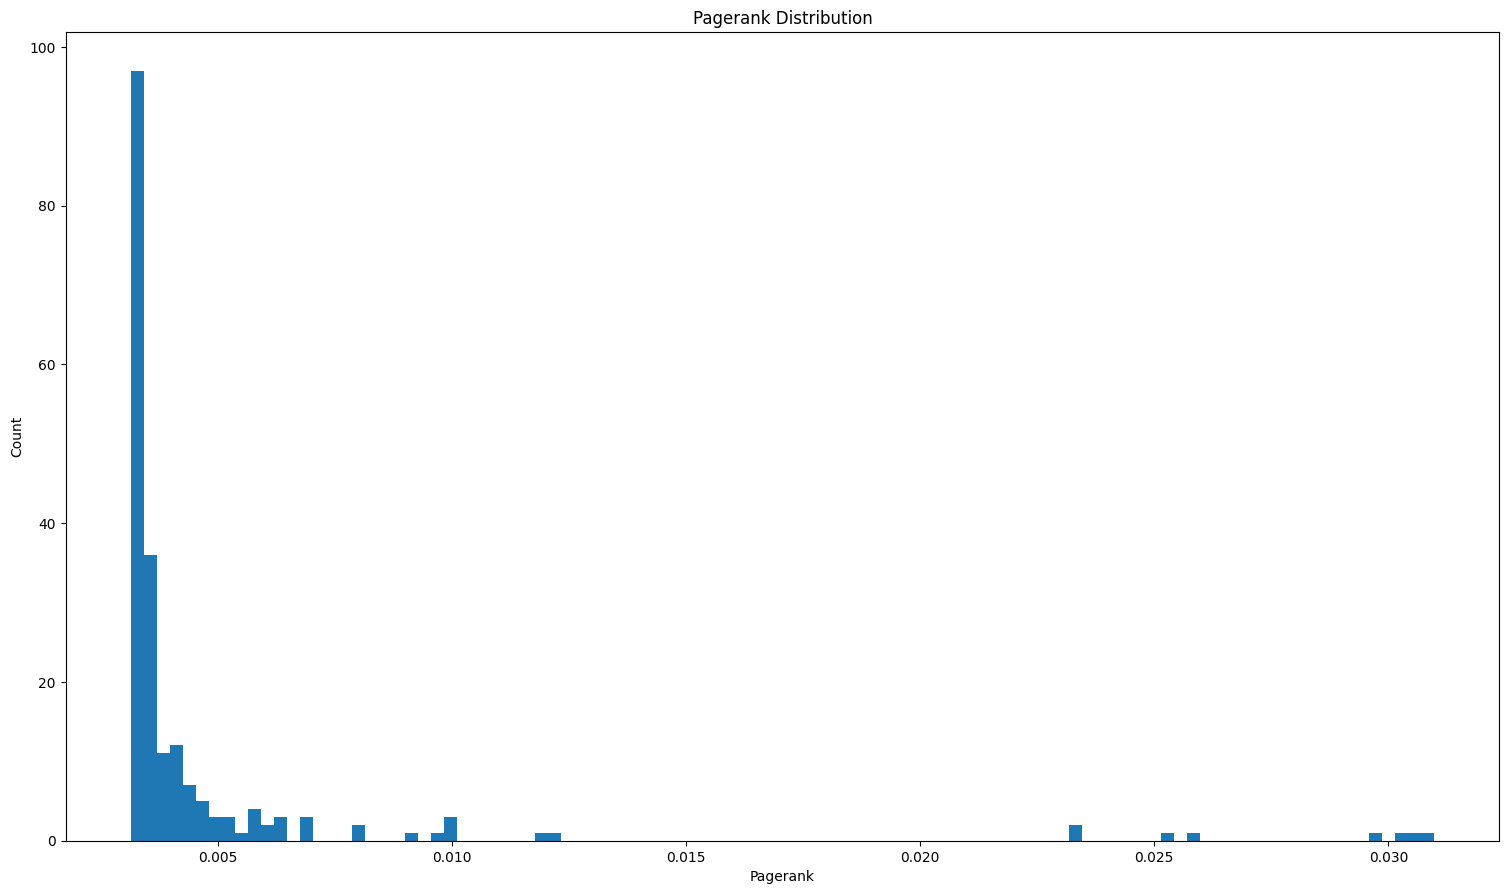

In [47]:
#plot the pagerank distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.hist(pagerank.values(), bins=100)
plt.title("Pagerank Distribution")
plt.ylabel("Count")
plt.xlabel("Pagerank")
#make the plot bigger
fig.set_size_inches(18.5, 10.5)


In [48]:
#show the labels labels of the nodes and their pagerank sorted in descending order
counter = 0
for i in sorted(pagerank.items(), key=lambda x: x[1], reverse=True):
    counter += 1
    print(counter, final.nodes[i[0]]['label'], i[1])

1 Linus Tech Tips 0.030981061072604267
2 Ludwig 0.03068840647799553
3 Mogul Mail 0.03026467807846753
4 ShortCircuit 0.029639308648543975
5 Bellular Warcraft 0.0257425119288963
6 Bellular News 0.025235105107363556
7 Corridor Crew 0.023364478432296363
8 Corridor 0.02332600539539332
9 KiraTV 0.012316108639447286
10 OTK 0.01184818163173311
11 Josh Strife Hayes 0.010022820438561633
12 Emiru 0.009956481612283038
13 Steak and Eggs Podcast 0.009956481612283038
14 TheLazyPeon 0.009601281485778447
15 Kira 0.009177032106531126
16 Stoopzz 0.007906631716990868
17 VaatiVidya 0.007868080323259806
18 Ashes of Creation 0.006997279770166359
19 SomeOrdinaryGamers 0.00683715018584605
20 PewDiePie 0.006774268920834781
21 Venruki 0.006411528486232114
22 videogamedunkey 0.006367140676110762
23 Jim Sterling 0.006247987036089874
24 penguinz0 0.006161558978004116
25 Barny64 0.005999513714709971
26 Ratatoskr 0.005798152305479459
27 boogie2988 0.005766138697397526
28 Esfand 0.005724153603199197
29 Nmplol 0.005652

In [83]:
#create a dataframe with all the centrality measures

centrality_df = pd.DataFrame({'label': dict(final.nodes(data='label')),
                              'degree': dict(final.degree()),
                              'in_degree': dict(final.in_degree()),
                              'out_degree': dict(final.out_degree()),
                              'degree_centrality': nx.degree_centrality(final),
                              'closeness_centrality': nx.closeness_centrality(final),
                              'betweenness_centrality': nx.betweenness_centrality(final),
                              'eigenvector_centrality': nx.eigenvector_centrality(final),
                              'pagerank': nx.pagerank(final),
                              'subscribercount': nx.get_node_attributes(final, 'subscribercount')})

In [69]:
centrality_df
#make it to the 5ht decimal
centrality_df = centrality_df.round(4)
#export the dataframe to a csv file
centrality_df.to_csv('centrality.csv', index=False)

In [51]:
#add to centrality_df the a column called class that will have the value 8 for all
centrality_df['class'] = 8
#for this list of labels TA Outdoors Skallagrim ColdFusion Joshua Fluke Marques Brownlee Trilogy Media Viva La Dirt League ShortCircuit TheReportOfTheWeek Coffeezilla Modern History TV Flashgitz LegalEagle Corridor Corridor Crew Preach Gaming Linus Tech Tips Mark Rober Logically Answered change the value of class to 0
centrality_df.loc[centrality_df['label'].isin(['TA Outdoors', 'Skallagrim', 'ColdFusion', 'Joshua Fluke', 'Marques Brownlee', 'Trilogy Media', 'Viva La Dirt League', 'ShortCircuit', 'TheReportOfTheWeek', 'Coffeezilla', 'Modern History TV', 'Flashgitz', 'LegalEagle', 'Corridor', 'Corridor Crew', 'Preach Gaming', 'Linus Tech Tips', 'Mark Rober', 'Logically Answered']), 'class'] = 0

In [52]:
#show only the rows with class 0
centrality_df[centrality_df['class'] == 0]

label  degree  in_degree  out_degree  \
UCZRoNJu1OszFqABP8AuJIuw   Logically Answered      17          1          16   
UCY1kMZp36IQSyNx_9h4mpCg           Mark Rober       6          6           0   
UCXuqSBlHAE6Xw-yeJA0Tunw      Linus Tech Tips      11         10           1   
UCSpFnDQr88xCZ80N-X7t0nQ        Corridor Crew       5          4           1   
UCsn6cjffsvyOZCZxvGoJxGg             Corridor       4          3           1   
UCpa-Zb0ZcQjTCPP1Dx_1M8Q           LegalEagle       4          4           0   
UCNnKprAG-MWLsk-GsbsC2BA            Flashgitz       2          2           0   
UCMjlDOf0UO9wSijFqPE9wBw    Modern History TV       7          1           6   
UCFQMnBA3CS502aghlcr0_aw          Coffeezilla       7          7           0   
UCeR0n8d3ShTn_yrMhpwyE1Q   TheReportOfTheWeek       3          3           0   
UCdBK94H6oZT2Q7l0-b0xmMg         ShortCircuit       4          3           1   
UCchBatdUMZoMfJ3rIzgV84g  Viva La Dirt League       2          2           0   
UCca2961Ton2js_f9IDXK9Wg        Trilogy Media       2          2           0   
UCBJycsmduvYEL83R_U4JriQ     Marques Brownlee       5          5           0   
UC-91UA-Xy2Cvb98deRXuggA         Joshua Fluke      13          3          10   
UC4QZ_LsYcvcq7qOsOhpAX4A           ColdFusion       2          2           0   
UC3WIohkLkH4GFoMrrWVZZFA           Skallagrim       3          3           0   
UC2SMpy2oZV6BoyJEYShw9bw          TA Outdoors       2          2           0   
UCXJL3ST-O0J3nqzQyPJtpNg        Preach Gaming       5          2           3   

                          degree_centrality  closeness_centrality  \
UCZRoNJu1OszFqABP8AuJIuw           0.083744              0.039484   
UCY1kMZp36IQSyNx_9h4mpCg           0.029557              0.055501   
UCXuqSBlHAE6Xw-yeJA0Tunw           0.054187              0.066587   
UCSpFnDQr88xCZ80N-X7t0nQ           0.024631              0.049702   
UCsn6cjffsvyOZCZxvGoJxGg           0.019704              0.048262   
UCpa-Zb0ZcQjTCPP1Dx_1M8Q           0.019704              0.047366   
UCNnKprAG-MWLsk-GsbsC2BA           0.009852              0.042350   
UCMjlDOf0UO9wSijFqPE9wBw           0.034483              0.039484   
UCFQMnBA3CS502aghlcr0_aw           0.034483              0.057415   
UCeR0n8d3ShTn_yrMhpwyE1Q           0.014778              0.050579   
UCdBK94H6oZT2Q7l0-b0xmMg           0.019704              0.056795   
UCchBatdUMZoMfJ3rIzgV84g           0.009852              0.042350   
UCca2961Ton2js_f9IDXK9Wg           0.009852              0.042350   
UCBJycsmduvYEL83R_U4JriQ           0.024631              0.050455   
UC-91UA-Xy2Cvb98deRXuggA           0.064039              0.043653   
UC4QZ_LsYcvcq7qOsOhpAX4A           0.009852              0.042350   
UC3WIohkLkH4GFoMrrWVZZFA           0.014778              0.043653   
UC2SMpy2oZV6BoyJEYShw9bw           0.009852              0.042350   
UCXJL3ST-O0J3nqzQyPJtpNg           0.024631              0.043432   

                          betweenness_centrality  eigenvector_centrality  \
UCZRoNJu1OszFqABP8AuJIuw                0.000000                0.030727   
UCY1kMZp36IQSyNx_9h4mpCg                0.000000                0.089645   
UCXuqSBlHAE6Xw-yeJA0Tunw                0.000203                0.124475   
UCSpFnDQr88xCZ80N-X7t0nQ                0.000020                0.071568   
UCsn6cjffsvyOZCZxvGoJxGg                0.000000                0.056369   
UCpa-Zb0ZcQjTCPP1Dx_1M8Q                0.000000                0.069074   
UCNnKprAG-MWLsk-GsbsC2BA                0.000000                0.037253   
UCMjlDOf0UO9wSijFqPE9wBw                0.000000                0.030727   
UCFQMnBA3CS502aghlcr0_aw                0.000000                0.119094   
UCeR0n8d3ShTn_yrMhpwyE1Q                0.000000                0.058056   
UCdBK94H6oZT2Q7l0-b0xmMg                0.000000                0.063694   
UCchBatdUMZoMfJ3rIzgV84g                0.000000                0.037253   
UCca2961Ton2js_f9IDXK9Wg                0.000000                0.0372

In [53]:
#give the value 1 to the class column for the nodes with the following labels NovemberHotel, MMOByte, Tolarian Community College, World of Warcraft, bbno$, Jesse Cox, KiraTV, PyroLIVE, TheLazyPeon, Rextroy, Ashes of Creation, Nixxiom, Force Gaming, Philion, MetaGoblin, Upper Echelon, HOUNGOUNGAGNE, Modern Vintage Gamer, Myndflame, Josh Strife Says, Moon, Kira, Atozy, MadSeasonShow, Demone Kim, CohhCarnage, Josh Strife Hayes, Narc, The Critical Drinker, Whiteboard Crypto, Kanon, SomeOrdinaryGamers, Entrepreneurs in Cars, Adam Millard - The Architect of Games, Lucky Ghost.

centrality_df.loc[centrality_df['label'].isin(['NovemberHotel', 'MMOByte', 'Tolarian Community College', 'World of Warcraft', 'bbno$', 'Jesse Cox', 'KiraTV', 'PyroLIVE', 'TheLazyPeon', 'Rextroy', 'Ashes of Creation', 'Nixxiom', 'Force Gaming', 'Philion', 'MetaGoblin', 'Upper Echelon', 'HOUNGOUNGAGNE', 'Modern Vintage Gamer', 'Myndflame', 'Josh Strife Says', 'Moon', 'Kira', 'Atozy', 'MadSeasonShow', 'Demone Kim', 'CohhCarnage', 'Josh Strife Hayes', 'Narc', 'The Critical Drinker', 'Whiteboard Crypto', 'Kanon', 'SomeOrdinaryGamers', 'Entrepreneurs in Cars', 'Adam Millard - The Architect of Games', 'Lucky Ghost']), 'class'] = 1

In [54]:
#show only the rows with class 1
centrality_df[centrality_df['class'] == 1]

label  degree  \
UCmFeOdJI3IXgTBDzqBLD8qg                                   Moon       3   
UCyeXkOdGbwveA-EtwQLeTYA                            Lucky Ghost       2   
UCY3A_5R_m3PXCn5XDhvBBsg  Adam Millard - The Architect of Games       2   
UCuKqtwPO5ci5_KoZGbfl33g                  Entrepreneurs in Cars       2   
UCtMVHI3AJD4Qk4hcbZnI9ZQ                     SomeOrdinaryGamers       5   
UCsYYksPHiGqXHPoHI-fm5sg                      Whiteboard Crypto       2   
UCSJPFQdZwrOutnmSFYtbstA                   The Critical Drinker       4   
UCsdaTfavmVB-bxHj4Cqw4Xw                                   Narc       3   
UCRWyPm7MrfotIYF8A8MGV3g                      Josh Strife Hayes      36   
UCp76b_m_wL_Mb5SFuDQlUsg                             Demone Kim       2   
UCNLppbTtCHMpuW-1glHqFKg                                   Kira       6   
UCKr-aOmHkFUg6P9B8A_6jgQ                       Josh Strife Says       4   
UChI0q9a-ZcbZh7dAu_-J-hg                          Upper Echelon       4   
UCh_Oh38_11a_NDVJC4zyziQ                             MetaGoblin       7   
UCgKJPhVzv8w0VaZFnS_VmaA                                Philion       4   
UCfbi2EvzQmIJ55TJvZumNZw                      Ashes of Creation       4   
UCE-f0sqi-H7kuLT0YiW9rcA                            TheLazyPeon      26   
UCcKSEzhtEkzfCT8_DzyMfpg                                 KiraTV       8   
UC7-hR5EfgpM6oHfiGDkxfMA             Tolarian Community College       5   
UC4OWLYVuwj55RzgmBbY2afg                          NovemberHotel       2   
UCp9TXGvv2-7JVVdyKEi0A6A                            CohhCarnage       3   
UCOvz3kkYZtCTeXKdiuMG8eg                          MadSeasonShow       3   
UCjFaPUcJU1vwk193mnW_w1w                   Modern Vintage Gamer       4   
UCGhs9S33RAeT5DEuKTO4Oew                           Force Gaming       3   
UCO7dBj4bwaDOMoX-kKYF2Ww                                  Atozy      20   
UCJPUc1HICxQDa83muc3YFjA                              Myndflame      10   
UChpiQy7AuKxVAdGj2dB1x1Q                          HOUNGOUNGAGNE       2   
UCfMb2S7Aqnr4zQDJkYwgkgw                                Nixxiom       7   
UCf8BuPKoB2xLIlVgqQfZgEw                                Rextroy       9   
UCdc_JyNaB5VJ0gdWUtWfGDg                               PyroLIVE       3   
UCCbfB3cQtkEAiKfdRQnfQvw                              Jesse Cox       5   
UCC8FSfSnbjiZ6vGr68ZLtzg                                  bbno$       2   
UCbLj9QP9FAaHs_647QckGtg                      World of Warcraft       7   
UCtF90wyZYze6xc-9OnCs_IQ                                  Kanon       3   
UC6y5h-dW-A6RBRHXDPlj9Rg                                MMOByte       3   

                          in_degree  out_degree  degree_centrality  \
UCmFeOdJI3IXgTBDzqBLD8qg          3           0           0.014778   
UCyeXkOdGbwveA-EtwQLeTYA          2           0           0.009852   
UCY3A_5R_m3PXCn5XDhvBBsg          2           0           0.009852   
UCuKqtwPO5ci5_KoZGbfl33g          2           0           0.009852   
UCtMVHI3AJD4Qk4hcbZnI9ZQ          5           0           0.024631   
UCsYYksPHiGqXHPoHI-fm5sg          2           0           0.009852   
UCSJPFQdZwrOutnmSFYtbstA          4           0           0.019704   
UCsdaTfavmVB-bxHj4Cqw4Xw          2           1           0.014778   
UCRWyPm7MrfotIYF8A8MGV3g         10          26           0.177340   
UCp76b_m_wL_Mb5SFuDQlUsg          2           0           0.009852   
UCNLppbTtCHMpuW-1glHqFKg          5           1           0.029557   
UCKr-aOmHkFUg6P9B8A_6jgQ          3           1           0.019704   
UChI0q9a-ZcbZh7dAu_-J-hg          4           0           0.019704   
UCh_Oh38_11a_NDVJC4zyziQ          1           6           0.034483   
UCgKJPhVzv8w0VaZFnS_VmaA          4           0           0.019704   
UCfbi2EvzQmIJ55TJvZumNZw          4           0           0.019704   
UCE-f0sqi-H7kuLT0YiW9rcA          6          20           0.128079   
UCcKSEzhtEkzfCT8_DzyMfpg          6           2           0.039409   
UC7-hR5EfgpM6oHfiGDkxfMA   

In [55]:
#give the value 2 to the class column for the nodes with the following labels  The Comeback Kids, Bellular News, Destiny, MitchManix, Zizaran, Maya, Team Darkside, OTK, Stoopzz, Gamers Nexus, Ser Medieval, Esfand, WolfheartFPS, Savix, Click4Gameplay, Steak and Eggs Podcast, Rich W Campbell, Hazelnuttygames, Legacy Gaming, DarthMicrotransaction TV, ATK, PILAV, Open World Games, ZealsAmbitions, Larian Studios, Payo, Rhykker, Raxxanterax, YongYea, Platinum WoW, Bellular Warcraft, Nmplol, Emiru.

centrality_df.loc[centrality_df['label'].isin(['The Comeback Kids', 'Bellular News', 'Destiny', 'MitchManix', 'Zizaran', 'Maya', 'Team Darkside', 'OTK', 'Stoopzz', 'Gamers Nexus', 'Ser Medieval', 'Esfand', 'WolfheartFPS', 'Savix', 'Click4Gameplay', 'Steak and Eggs Podcast', 'Rich W Campbell', 'Hazelnuttygames', 'Legacy Gaming', 'DarthMicrotransaction TV', 'ATK', 'PILAV', 'Open World Games', 'ZealsAmbitions', 'Larian Studios', 'Payo', 'Rhykker', 'Raxxanterax', 'YongYea', 'Platinum WoW', 'Bellular Warcraft', 'Nmplol', 'Emiru']), 'class'] = 2

In [56]:
#show only the rows with class 2
centrality_df[centrality_df['class'] == 2]

label  degree  in_degree  \
UChIs72whgZI9w6d6FhwGGHA              Gamers Nexus       4          4   
UCT6iAerLNE-0J1S_E97UAuQ                   YongYea       7          7   
UCp-2EdzeeYwdecqMoXmHIQw          Open World Games       2          2   
UCoi8nOe2z-Xi3ZcU7ddvOlQ                     PILAV       4          4   
UCmlqW3C9C0_gA0LufzbHfKg             Legacy Gaming       4          4   
UCHTdZTK96KEndIIvRR6sCsQ              Ser Medieval       9          2   
UC84PVGjO0Q5rgzKXM5aAtvQ                MitchManix       5          5   
UC_ODNEPbkVolMCWSjchNdfA         The Comeback Kids       7          2   
UCZprw7Bxzfh2IysXNnl1S3g                     Emiru       6          4   
UCyclX6ZQCOXunEg4Z7EA8fw                    Nmplol       2          2   
UCTqUnnRlK-n44W6xPlx6JVQ              Platinum WoW       2          2   
UCQ-AAXSt0M5Gx0-A9UGut8g            Larian Studios       2          2   
UCMGVp_GnkhHZROIfRdXpo4Q           Hazelnuttygames       3          3   
UCKB19lHyPlwvBH9be2POF3A           Rich W Campbell       2          2   
UCkAsdQZolgJdKmZ3T3zn-dA    Steak and Eggs Podcast       6          4   
UCjekkqakBWqPu44aExSDxxA            Click4Gameplay      49          3   
UCi3RdvCWYMzdF-iUgG_0xLQ              WolfheartFPS       3          3   
UChX76aZbAkJBdQQ2iAm-GQg                    Esfand       3          3   
UCgpRORu9JQFC_jtQeQ99hBA                       OTK       9          5   
UCG8wOav28pu6mT9NXRlWohw             Team Darkside       2          2   
UCeIuImWY9NA05cbRJd4cFIw                      Maya       2          2   
UCwiaPYufmQOq5F1TI-FzQhw         Bellular Warcraft       6          5   
UCs20qCPrd1AXRviSTdVCoAg               Raxxanterax       2          2   
UCRl31PWkfF0a3j3hiDRaCGA                   Rhykker       2          2   
UCQ-czOmPo1JYi1wKFi7wY8w                      Payo       3          3   
UCpDcj6E73QeFkmqk7gH5wxA            ZealsAmbitions       2          2   
UCnNxAvUmdeTi437c7PrjKDw                       ATK       3          2   
UCn0LYvsnbm-Nk-44neVKfXg  DarthMicrotransaction TV       3          3   
UCIRe2YighqgPmSDjSb3Fpiw                     Savix       5          3   
UChGcWDcAbCoRvCc3vaW1m2A                   Stoopzz      35          5   
UCAG3CiKOUkQysyKCXSFEBPA                   Zizaran       4          4   
UC554eY5jNUfDq3yDOJYirOQ                   Destiny       2          2   
UC3nPaf5MeeDTHA2JN7clidg             Bellular News       4          3   

                          out_degree  degree_centrality  closeness_centrality  \
UChIs72whgZI9w6d6FhwGGHA           0           0.019704              0.048092   
UCT6iAerLNE-0J1S_E97UAuQ           0           0.034483              0.054566   
UCp-2EdzeeYwdecqMoXmHIQw           0           0.009852              0.042031   
UCoi8nOe2z-Xi3ZcU7ddvOlQ           0           0.019704              0.047380   
UCmlqW3C9C0_gA0LufzbHfKg           0           0.019704              0.048258   
UCHTdZTK96KEndIIvRR6sCsQ           7           0.044335              0.041108   
UC84PVGjO0Q5rgzKXM5aAtvQ           0           0.024631              0.052118   
UC_ODNEPbkVolMCWSjchNdfA           5           0.034483              0.039737   
UCZprw7Bxzfh2IysXNnl1S3g           2           0.029557              0.048971   
UCyclX6ZQCOXunEg4Z7EA8fw           0           0.009852              0.049194   
UCTqUnnRlK-n44W6xPlx6JVQ           0           0.009852              0.040717   
UCQ-AAXSt0M5Gx0-A9UGut8g           0           0.009852              0.040717   
UCMGVp_GnkhHZROIfRdXpo4Q           0           0.014778              0.044930   
UCKB19lHyPlwvBH9be2POF3A           0           0.009852              0.040717   
UCkAsdQZolgJdKmZ3T3zn-dA           2           0.029557              0.048971   
UCjekkqakBWqPu44aExSDxxA          46           0.241379              0.043350   
UCi3RdvCWYMzdF-iUgG_0xLQ           0           0.014778              0.041364   
UChX76aZbAkJBdQQ2iAm-GQg           0           0.014778              0.050579   
UCgpRORu9JQFC_jtQeQ99hB

In [57]:
centrality_df

label  degree  in_degree  out_degree  \
UCZRoNJu1OszFqABP8AuJIuw  Logically Answered      17          1          16   
UCY1kMZp36IQSyNx_9h4mpCg          Mark Rober       6          6           0   
UCXuqSBlHAE6Xw-yeJA0Tunw     Linus Tech Tips      11         10           1   
UCW7h-1mymnJ96akzjrmiIgA          Capcom USA       2          2           0   
UCSpFnDQr88xCZ80N-X7t0nQ       Corridor Crew       5          4           1   
...                                      ...     ...        ...         ...   
UChGcWDcAbCoRvCc3vaW1m2A             Stoopzz      35          5          30   
UCAG3CiKOUkQysyKCXSFEBPA             Zizaran       4          4           0   
UC6y5h-dW-A6RBRHXDPlj9Rg             MMOByte       3          3           0   
UC554eY5jNUfDq3yDOJYirOQ             Destiny       2          2           0   
UC3nPaf5MeeDTHA2JN7clidg       Bellular News       4          3           1   

                          degree_centrality  closeness_centrality  \
UCZRoNJu1OszFqABP8AuJIuw           0.083744              0.039484   
UCY1kMZp36IQSyNx_9h4mpCg           0.029557              0.055501   
UCXuqSBlHAE6Xw-yeJA0Tunw           0.054187              0.066587   
UCW7h-1mymnJ96akzjrmiIgA           0.009852              0.042350   
UCSpFnDQr88xCZ80N-X7t0nQ           0.024631              0.049702   
...                                     ...                   ...   
UChGcWDcAbCoRvCc3vaW1m2A           0.172414              0.045851   
UCAG3CiKOUkQysyKCXSFEBPA           0.019704              0.047380   
UC6y5h-dW-A6RBRHXDPlj9Rg           0.014778              0.049168   
UC554eY5jNUfDq3yDOJYirOQ           0.009852              0.043432   
UC3nPaf5MeeDTHA2JN7clidg           0.019704              0.052032   

                          betweenness_centrality  eigenvector_centrality  \
UCZRoNJu1OszFqABP8AuJIuw                0.000000                0.030727   
UCY1kMZp36IQSyNx_9h4mpCg                0.000000                0.089645   
UCXuqSBlHAE6Xw-yeJA0Tunw                0.000203                0.124475   
UCW7h-1mymnJ96akzjrmiIgA                0.000000                0.037253   
UCSpFnDQr88xCZ80N-X7t0nQ                0.000020                0.071568   
...                                          ...                     ...   
UChGcWDcAbCoRvCc3vaW1m2A                0.021426                0.088848   
UCAG3CiKOUkQysyKCXSFEBPA                0.000000                0.093322   
UC6y5h-dW-A6RBRHXDPlj9Rg                0.000000                0.092082   
UC554eY5jNUfDq3yDOJYirOQ                0.000000                0.049599   
UC3nPaf5MeeDTHA2JN7clidg                0.000000                0.067061   

                          pagerank  subscribercount  class  
UCZRoNJu1OszFqABP8AuJIuw  0.003134           548000      0  
UCY1kMZp36IQSyNx_9h4mpCg  0.004394         29300000      0  
UCXuqSBlHAE6Xw-yeJA0Tunw  0.030981         15500000      0  
UCW7h-1mymnJ96akzjrmiIgA  0.003312           291000      8  
UCSpFnDQr88xCZ80N-X7t0nQ  0.023364          6290000      0  
...                            ...              ...    ...  
UChGcWDcAbCoRvCc3vaW1m2A  0.007907           125000      2  
UCAG3CiKOUkQysyKCXSFEBPA  0.003562           259000      2  
UC6y5h-dW-A6RBRHXDPlj9Rg  0.003686           365000      1  
UC554eY5jNUfDq3yDOJYirOQ  0.003358           750000      2  
UC3nPaf5MeeDTHA2JN7clidg  0.025235           311000      2  

[204 rows x 11 columns]

In [58]:
# class 3 for those nodes ReviewTechUSA, WillE, Asmongold, Karl Jobst, Wisecrack, Oroboro, Gigguk, The Act Man, hirumaredx, Distortion2, VaatiVidya, Kripparrian, ShreddedNerd, Paul Tassi, Atrioc, Mogul Mail, penguinz0, Bricky, Ludwig, NakeyJakey, videogamedunkey, theneedledrop, Rav, SunnyV2, Xenosys Vex, Totally Not Mark, CircleToonsHD, Sywo, LongBeachGriffy, Skill Up.

centrality_df.loc[centrality_df['label'].isin(['ReviewTechUSA', 'WillE', 'Asmongold', 'Karl Jobst', 'Wisecrack', 'Oroboro', 'Gigguk', 'The Act Man', 'hirumaredx', 'Distortion2', 'VaatiVidya', 'Kripparrian', 'ShreddedNerd', 'Paul Tassi', 'Atrioc', 'Mogul Mail', 'penguinz0', 'Bricky', 'Ludwig', 'NakeyJakey', 'videogamedunkey', 'theneedledrop', 'Rav', 'SunnyV2', 'Xenosys Vex', 'Totally Not Mark', 'CircleToonsHD', 'Sywo','LongBeachGriffy', 'Skill Up']), 'class'] = 3



In [59]:
#show only the rows with class 3
centrality_df[centrality_df['class'] == 3]

label  degree  in_degree  out_degree  \
UCrPseYLGpNygVi34QpGNqpA            Ludwig       9          8           1   
UCjK0F1DopxQ5U0sCwOlXwOg        Mogul Mail       6          5           1   
UCgv4dPk_qZNAbUW9WkuLPSA            Atrioc       6          2           4   
UC__Oy3QdB3d9_FHO_XG1PZg     ReviewTechUSA       3          3           0   
UCWajiTYyiwalcfbJO-bDVpQ              Sywo       4          4           0   
UCv3LuuW8auzYw1SdLmiLRAw  Totally Not Mark       2          2           0   
UCufmMfFTkZSi0sHWBhzz9yg       Xenosys Vex       9          2           7   
UCuF49lP5gkkw5L8HK3H6GJg           SunnyV2       7          7           0   
UCqdcfoz9hDXCXbJDaklkwjQ            Bricky       2          2           0   
UCfwJBTwTgdCj5IHmBcOD8Vg      ShreddedNerd       2          2           0   
UCap5sQEW2w7aoM2ehCdNVNQ        hirumaredx       2          2           0   
UC7WDD6yHgzdqijHluCi1z-Q       The Act Man      35          5          30   
UC3ltptWa0xfrDweghW94Acg        Karl Jobst       4          4           0   
UCZ7AeeVbyslLM_8-nVy2B8Q          Skill Up       5          5           0   
UCWiY6fYdxuEe78r-0uFCnhA   LongBeachGriffy       5          2           3   
UCV6g95OBbVtFmN9uiJzkFqQ     CircleToonsHD       2          2           0   
UCtyjKSJa-3kMbCSjjOCLq2A               Rav       2          2           0   
UCt7fwAhXDy3oNFTAzF2o8Pw     theneedledrop       2          2           0   
UCsvn_Po0SmunchJYOWpOxMg   videogamedunkey       9          9           0   
UCSdma21fnJzgmPodhC9SJ3g        NakeyJakey      13          5           8   
UCq6VFHwMzcMXbuKyG7SQYIg         penguinz0      10         10           0   
UCg6K8i6OGobyZNoPIsCW9uQ        Paul Tassi       5          1           4   
UCeBMccz-PDZf6OB4aV6a3eA       Kripparrian       4          4           0   
UC7dF9qfBMXrSlaaFFDvV_Yg            Gigguk       8          1           7   
UC6-ymYjG0SU0jUWnWh9ZzEQ         Wisecrack       2          2           0   
UCe0DNp0mKMqrYVaTundyr9w        VaatiVidya       7          7           0   
UCBaHYWh_265k73PxkgaNkrA       Distortion2       7          1           6   
UC73Us1H9hxv__5oobyLDOyw           Oroboro       2          1           1   
UC1kvvdjChB40wuzcynmgsCw         Asmongold       4          4           0   
UC1haxYclmhXwa4FKFqYSaRw             WillE       2          2           0   

                          degree_centrality  closeness_centrality  \
UCrPseYLGpNygVi34QpGNqpA           0.044335              0.057415   
UCjK0F1DopxQ5U0sCwOlXwOg           0.029557              0.055501   
UCgv4dPk_qZNAbUW9WkuLPSA           0.029557              0.039086   
UC__Oy3QdB3d9_FHO_XG1PZg           0.014778              0.044335   
UCWajiTYyiwalcfbJO-bDVpQ           0.019704              0.046534   
UCv3LuuW8auzYw1SdLmiLRAw           0.009852              0.041364   
UCufmMfFTkZSi0sHWBhzz9yg           0.044335              0.042576   
UCuF49lP5gkkw5L8HK3H6GJg           0.034483              0.059208   
UCqdcfoz9hDXCXbJDaklkwjQ           0.009852              0.041364   
UCfwJBTwTgdCj5IHmBcOD8Vg           0.009852              0.041364   
UCap5sQEW2w7aoM2ehCdNVNQ           0.009852              0.041364   
UC7WDD6yHgzdqijHluCi1z-Q           0.172414              0.045851   
UC3ltptWa0xfrDweghW94Acg           0.019704              0.056111   
UCZ7AeeVbyslLM_8-nVy2B8Q           0.024631              0.055172   
UCWiY6fYdxuEe78r-0uFCnhA           0.024631              0.048529   
UCV6g95OBbVtFmN9uiJzkFqQ           0.009852              0.042350   
UCtyjKSJa-3kMbCSjjOCLq2A           0.009852              0.042350   
UCt7fwAhXDy3oNFTAzF2o8Pw           0.009852              0.048529   
UCsvn_Po0SmunchJYOWpOxMg           0.044335              0.062771   
UCSdma21fnJzgmPodhC9SJ3g           0.064039              0.050455   
UCq6VFHwMzcMXbuKyG7SQYIg           0.049261              0.066587   
UCg6K8i6OGobyZNoPIsCW9uQ           0.024631              0.039484   
UCeBMccz-PDZf6OB4aV6a3eA           0.019704              0.048

In [60]:
centrality_df

label  degree  in_degree  out_degree  \
UCZRoNJu1OszFqABP8AuJIuw  Logically Answered      17          1          16   
UCY1kMZp36IQSyNx_9h4mpCg          Mark Rober       6          6           0   
UCXuqSBlHAE6Xw-yeJA0Tunw     Linus Tech Tips      11         10           1   
UCW7h-1mymnJ96akzjrmiIgA          Capcom USA       2          2           0   
UCSpFnDQr88xCZ80N-X7t0nQ       Corridor Crew       5          4           1   
...                                      ...     ...        ...         ...   
UChGcWDcAbCoRvCc3vaW1m2A             Stoopzz      35          5          30   
UCAG3CiKOUkQysyKCXSFEBPA             Zizaran       4          4           0   
UC6y5h-dW-A6RBRHXDPlj9Rg             MMOByte       3          3           0   
UC554eY5jNUfDq3yDOJYirOQ             Destiny       2          2           0   
UC3nPaf5MeeDTHA2JN7clidg       Bellular News       4          3           1   

                          degree_centrality  closeness_centrality  \
UCZRoNJu1OszFqABP8AuJIuw           0.083744              0.039484   
UCY1kMZp36IQSyNx_9h4mpCg           0.029557              0.055501   
UCXuqSBlHAE6Xw-yeJA0Tunw           0.054187              0.066587   
UCW7h-1mymnJ96akzjrmiIgA           0.009852              0.042350   
UCSpFnDQr88xCZ80N-X7t0nQ           0.024631              0.049702   
...                                     ...                   ...   
UChGcWDcAbCoRvCc3vaW1m2A           0.172414              0.045851   
UCAG3CiKOUkQysyKCXSFEBPA           0.019704              0.047380   
UC6y5h-dW-A6RBRHXDPlj9Rg           0.014778              0.049168   
UC554eY5jNUfDq3yDOJYirOQ           0.009852              0.043432   
UC3nPaf5MeeDTHA2JN7clidg           0.019704              0.052032   

                          betweenness_centrality  eigenvector_centrality  \
UCZRoNJu1OszFqABP8AuJIuw                0.000000                0.030727   
UCY1kMZp36IQSyNx_9h4mpCg                0.000000                0.089645   
UCXuqSBlHAE6Xw-yeJA0Tunw                0.000203                0.124475   
UCW7h-1mymnJ96akzjrmiIgA                0.000000                0.037253   
UCSpFnDQr88xCZ80N-X7t0nQ                0.000020                0.071568   
...                                          ...                     ...   
UChGcWDcAbCoRvCc3vaW1m2A                0.021426                0.088848   
UCAG3CiKOUkQysyKCXSFEBPA                0.000000                0.093322   
UC6y5h-dW-A6RBRHXDPlj9Rg                0.000000                0.092082   
UC554eY5jNUfDq3yDOJYirOQ                0.000000                0.049599   
UC3nPaf5MeeDTHA2JN7clidg                0.000000                0.067061   

                          pagerank  subscribercount  class  
UCZRoNJu1OszFqABP8AuJIuw  0.003134           548000      0  
UCY1kMZp36IQSyNx_9h4mpCg  0.004394         29300000      0  
UCXuqSBlHAE6Xw-yeJA0Tunw  0.030981         15500000      0  
UCW7h-1mymnJ96akzjrmiIgA  0.003312           291000      8  
UCSpFnDQr88xCZ80N-X7t0nQ  0.023364          6290000      0  
...                            ...              ...    ...  
UChGcWDcAbCoRvCc3vaW1m2A  0.007907           125000      2  
UCAG3CiKOUkQysyKCXSFEBPA  0.003562           259000      2  
UC6y5h-dW-A6RBRHXDPlj9Rg  0.003686           365000      1  
UC554eY5jNUfDq3yDOJYirOQ  0.003358           750000      2  
UC3nPaf5MeeDTHA2JN7clidg  0.025235           311000      2  

[204 rows x 11 columns]

In [61]:
#class 4 for those names CarbotAnimations, boogie2988, Swifty, AtheneWins, Nintendo Prime, Abroad in Japan, swiftyirl, IGN, PewDiePie, Mrwhosetheboss, AngryJoeShow, Capcom USA, Jim Sterling

centrality_df.loc[centrality_df['label'].isin(['CarbotAnimations', 'boogie2988', 'Swifty', 'AtheneWins', 'Nintendo Prime', 'Abroad in Japan', 'swiftyirl', 'IGN', 'PewDiePie', 'Mrwhosetheboss', 'AngryJoeShow', 'Capcom USA', 'Jim Sterling']), 'class'] = 4

In [62]:
#show only the rows with class 4
centrality_df[centrality_df['class'] == 4]

label  degree  in_degree  out_degree  \
UCW7h-1mymnJ96akzjrmiIgA        Capcom USA       2          2           0   
UCMiJRAwDNSNzuYeN2uWa0pA    Mrwhosetheboss       5          5           0   
UCKy1dAqELo0zrOtPkf0eTMw               IGN       4          4           0   
UCc0qpQO6y4aB4IaZtLCZMXg    Nintendo Prime      16          1          15   
UCWCw2Sd7RlYJ2yuNVHDWNOA      Jim Sterling       6          6           0   
UCsgv2QHkT2ljEixyulzOnUQ      AngryJoeShow       9          6           3   
UC-lHJZR3Gqxm24_Vd_AJ5Yw         PewDiePie      11         11           0   
UChYDO3y5H14ow7WjKMpj-bQ         swiftyirl       7          3           4   
UCHL9bfHTxCMi-7vfxQ-AYtg   Abroad in Japan       2          2           0   
UC-9C9d1qDDzA2jdH53vSIuA        AtheneWins       4          4           0   
UC6idiEhlPEreqzCWfQ_GiLw            Swifty      13          4           9   
UC1uug_uZrVmylfPVBLBvitQ  CarbotAnimations       3          3           0   
UC4_bwov47DseacR1-ttTdOg        boogie2988       6          6           0   

                          degree_centrality  closeness_centrality  \
UCW7h-1mymnJ96akzjrmiIgA           0.009852              0.042350   
UCMiJRAwDNSNzuYeN2uWa0pA           0.024631              0.051314   
UCKy1dAqELo0zrOtPkf0eTMw           0.019704              0.047291   
UCc0qpQO6y4aB4IaZtLCZMXg           0.078818              0.039484   
UCWCw2Sd7RlYJ2yuNVHDWNOA           0.029557              0.054591   
UCsgv2QHkT2ljEixyulzOnUQ           0.044335              0.048921   
UC-lHJZR3Gqxm24_Vd_AJ5Yw           0.054187              0.073980   
UChYDO3y5H14ow7WjKMpj-bQ           0.034483              0.042576   
UCHL9bfHTxCMi-7vfxQ-AYtg           0.009852              0.043432   
UC-9C9d1qDDzA2jdH53vSIuA           0.019704              0.044930   
UC6idiEhlPEreqzCWfQ_GiLw           0.064039              0.043350   
UC1uug_uZrVmylfPVBLBvitQ           0.014778              0.045718   
UC4_bwov47DseacR1-ttTdOg           0.029557              0.061834   

                          betweenness_centrality  eigenvector_centrality  \
UCW7h-1mymnJ96akzjrmiIgA                0.000000                0.037253   
UCMiJRAwDNSNzuYeN2uWa0pA                0.000000                0.076916   
UCKy1dAqELo0zrOtPkf0eTMw                0.000000                0.069246   
UCc0qpQO6y4aB4IaZtLCZMXg                0.000000                0.030727   
UCWCw2Sd7RlYJ2yuNVHDWNOA                0.000000                0.106088   
UCsgv2QHkT2ljEixyulzOnUQ                0.000199                0.101050   
UC-lHJZR3Gqxm24_Vd_AJ5Yw                0.000000                0.157461   
UChYDO3y5H14ow7WjKMpj-bQ                0.000075                0.063863   
UCHL9bfHTxCMi-7vfxQ-AYtg                0.000000                0.045435   
UC-9C9d1qDDzA2jdH53vSIuA                0.000000                0.065526   
UC6idiEhlPEreqzCWfQ_GiLw                0.007047                0.069246   
UC1uug_uZrVmylfPVBLBvitQ                0.000000                0.070729   
UC4_bwov47DseacR1-ttTdOg                0.000000                0.098274   

                          pagerank  subscribercount  class  
UCW7h-1mymnJ96akzjrmiIgA  0.003312           291000      4  
UCMiJRAwDNSNzuYeN2uWa0pA  0.003938         17600000      4  
UCKy1dAqELo0zrOtPkf0eTMw  0.004147         17900000      4  
UCc0qpQO6y4aB4IaZtLCZMXg  0.003134           132000      4  
UCWCw2Sd7RlYJ2yuNVHDWNOA  0.006248           763000      4  
UCsgv2QHkT2ljEixyulzOnUQ  0.004086          3290000      4  
UC-lHJZR3Gqxm24_Vd_AJ5Yw  0.006774        111000000      4  
UChYDO3y5H14ow7WjKMpj-bQ  0.003594           229000      4  
UCHL9bfHTxCMi-7vfxQ-AYtg  0.003522          2970000      4  
UC-9C9d1qDDzA2jdH53vSIuA  0.004426           679000      4  
UC6idiEhlPEreqzCWfQ_GiLw  0.004110           678000      4  
UC1uug_uZrVmylfPVBLBvitQ  0.003654          1770000      4  
UC4_bwov47DseacR1-ttTdOg  0.005766          4010000      4

In [63]:
centrality_df

label  degree  in_degree  out_degree  \
UCZRoNJu1OszFqABP8AuJIuw  Logically Answered      17          1          16   
UCY1kMZp36IQSyNx_9h4mpCg          Mark Rober       6          6           0   
UCXuqSBlHAE6Xw-yeJA0Tunw     Linus Tech Tips      11         10           1   
UCW7h-1mymnJ96akzjrmiIgA          Capcom USA       2          2           0   
UCSpFnDQr88xCZ80N-X7t0nQ       Corridor Crew       5          4           1   
...                                      ...     ...        ...         ...   
UChGcWDcAbCoRvCc3vaW1m2A             Stoopzz      35          5          30   
UCAG3CiKOUkQysyKCXSFEBPA             Zizaran       4          4           0   
UC6y5h-dW-A6RBRHXDPlj9Rg             MMOByte       3          3           0   
UC554eY5jNUfDq3yDOJYirOQ             Destiny       2          2           0   
UC3nPaf5MeeDTHA2JN7clidg       Bellular News       4          3           1   

                          degree_centrality  closeness_centrality  \
UCZRoNJu1OszFqABP8AuJIuw           0.083744              0.039484   
UCY1kMZp36IQSyNx_9h4mpCg           0.029557              0.055501   
UCXuqSBlHAE6Xw-yeJA0Tunw           0.054187              0.066587   
UCW7h-1mymnJ96akzjrmiIgA           0.009852              0.042350   
UCSpFnDQr88xCZ80N-X7t0nQ           0.024631              0.049702   
...                                     ...                   ...   
UChGcWDcAbCoRvCc3vaW1m2A           0.172414              0.045851   
UCAG3CiKOUkQysyKCXSFEBPA           0.019704              0.047380   
UC6y5h-dW-A6RBRHXDPlj9Rg           0.014778              0.049168   
UC554eY5jNUfDq3yDOJYirOQ           0.009852              0.043432   
UC3nPaf5MeeDTHA2JN7clidg           0.019704              0.052032   

                          betweenness_centrality  eigenvector_centrality  \
UCZRoNJu1OszFqABP8AuJIuw                0.000000                0.030727   
UCY1kMZp36IQSyNx_9h4mpCg                0.000000                0.089645   
UCXuqSBlHAE6Xw-yeJA0Tunw                0.000203                0.124475   
UCW7h-1mymnJ96akzjrmiIgA                0.000000                0.037253   
UCSpFnDQr88xCZ80N-X7t0nQ                0.000020                0.071568   
...                                          ...                     ...   
UChGcWDcAbCoRvCc3vaW1m2A                0.021426                0.088848   
UCAG3CiKOUkQysyKCXSFEBPA                0.000000                0.093322   
UC6y5h-dW-A6RBRHXDPlj9Rg                0.000000                0.092082   
UC554eY5jNUfDq3yDOJYirOQ                0.000000                0.049599   
UC3nPaf5MeeDTHA2JN7clidg                0.000000                0.067061   

                          pagerank  subscribercount  class  
UCZRoNJu1OszFqABP8AuJIuw  0.003134           548000      0  
UCY1kMZp36IQSyNx_9h4mpCg  0.004394         29300000      0  
UCXuqSBlHAE6Xw-yeJA0Tunw  0.030981         15500000      0  
UCW7h-1mymnJ96akzjrmiIgA  0.003312           291000      4  
UCSpFnDQr88xCZ80N-X7t0nQ  0.023364          6290000      0  
...                            ...              ...    ...  
UChGcWDcAbCoRvCc3vaW1m2A  0.007907           125000      2  
UCAG3CiKOUkQysyKCXSFEBPA  0.003562           259000      2  
UC6y5h-dW-A6RBRHXDPlj9Rg  0.003686           365000      1  
UC554eY5jNUfDq3yDOJYirOQ  0.003358           750000      2  
UC3nPaf5MeeDTHA2JN7clidg  0.025235           311000      2  

[204 rows x 11 columns]

In [64]:
#show the nodes with class 8
centrality_df[centrality_df['class'] == 8]

label  degree  in_degree  out_degree  \
UCzSwaGBTNe5nWiI3xWRQGWw           Swammy       1          1           0   
UCZSVvDqRX9_b377Jta8eA_Q            Kavos       1          1           0   
UC-XXmB9IHCUdteHjgmmsaeg       UberDanger       3          2           1   
UCXWdqucrtyk7dTKBhq4HObQ           Guiden       1          1           0   
UCxps9cbNgWrekrOMyt520aw   Trailer Crunch       1          1           0   
...                                   ...     ...        ...         ...   
UC4MGZcDG5hnzpi3hDpORkXw              MxR       1          1           0   
UC1yBKRuGpC1tSM73A0ZjYjQ  The Young Turks       2          2           0   
UC0aanx5rpr7D1M7KCFYzrLQ       Shoe0nHead       3          3           0   
UC_zmPqauxanOAGszXfdipEA   HeelvsBabyface       1          1           0   
UC_TVqp_SyG6j5hG-xVRy95A         Skrillex       1          1           0   

                          degree_centrality  closeness_centrality  \
UCzSwaGBTNe5nWiI3xWRQGWw           0.004926              0.039484   
UCZSVvDqRX9_b377Jta8eA_Q           0.004926              0.039484   
UC-XXmB9IHCUdteHjgmmsaeg           0.014778              0.040717   
UCXWdqucrtyk7dTKBhq4HObQ           0.004926              0.039484   
UCxps9cbNgWrekrOMyt520aw           0.004926              0.039484   
...                                     ...                   ...   
UC4MGZcDG5hnzpi3hDpORkXw           0.004926              0.039484   
UC1yBKRuGpC1tSM73A0ZjYjQ           0.009852              0.046902   
UC0aanx5rpr7D1M7KCFYzrLQ           0.014778              0.048971   
UC_zmPqauxanOAGszXfdipEA           0.004926              0.039484   
UC_TVqp_SyG6j5hG-xVRy95A           0.004926              0.039484   

                          betweenness_centrality  eigenvector_centrality  \
UCzSwaGBTNe5nWiI3xWRQGWw                 0.00000                0.030727   
UCZSVvDqRX9_b377Jta8eA_Q                 0.00000                0.030727   
UC-XXmB9IHCUdteHjgmmsaeg                 0.00002                0.049154   
UCXWdqucrtyk7dTKBhq4HObQ                 0.00000                0.030727   
UCxps9cbNgWrekrOMyt520aw                 0.00000                0.030727   
...                                          ...                     ...   
UC4MGZcDG5hnzpi3hDpORkXw                 0.00000                0.030727   
UC1yBKRuGpC1tSM73A0ZjYjQ                 0.00000                0.049049   
UC0aanx5rpr7D1M7KCFYzrLQ                 0.00000                0.074344   
UC_zmPqauxanOAGszXfdipEA                 0.00000                0.030727   
UC_TVqp_SyG6j5hG-xVRy95A                 0.00000                0.030727   

                          pagerank  subscribercount  class  
UCzSwaGBTNe5nWiI3xWRQGWw  0.003134           307000      8  
UCZSVvDqRX9_b377Jta8eA_Q  0.003134          1270000      8  
UC-XXmB9IHCUdteHjgmmsaeg  0.003206          1390000      8  
UCXWdqucrtyk7dTKBhq4HObQ  0.003134            61700      8  
UCxps9cbNgWrekrOMyt520aw  0.003134           164000      8  
...                            ...              ...    ...  
UC4MGZcDG5hnzpi3hDpORkXw  0.003134          2130000      8  
UC1yBKRuGpC1tSM73A0ZjYjQ  0.003876          5720000      8  
UC0aanx5rpr7D1M7KCFYzrLQ  0.004008          1850000      8  
UC_zmPqauxanOAGszXfdipEA  0.003134           359000      8  
UC_TVqp_SyG6j5hG-xVRy95A  0.003134         20200000      8  

[74 rows x 11 columns]

In [65]:
#count the nodes that have sub count greater that 10000000
centrality_df[centrality_df['subscribercount'] > 1000000]

label  degree  in_degree  out_degree  \
UCY1kMZp36IQSyNx_9h4mpCg       Mark Rober       6          6           0   
UCXuqSBlHAE6Xw-yeJA0Tunw  Linus Tech Tips      11         10           1   
UCSpFnDQr88xCZ80N-X7t0nQ    Corridor Crew       5          4           1   
UCsn6cjffsvyOZCZxvGoJxGg         Corridor       4          3           1   
UCrPseYLGpNygVi34QpGNqpA           Ludwig       9          8           1   
...                                   ...     ...        ...         ...   
UC4MGZcDG5hnzpi3hDpORkXw              MxR       1          1           0   
UC4_bwov47DseacR1-ttTdOg       boogie2988       6          6           0   
UC1yBKRuGpC1tSM73A0ZjYjQ  The Young Turks       2          2           0   
UC0aanx5rpr7D1M7KCFYzrLQ       Shoe0nHead       3          3           0   
UC_TVqp_SyG6j5hG-xVRy95A         Skrillex       1          1           0   

                          degree_centrality  closeness_centrality  \
UCY1kMZp36IQSyNx_9h4mpCg           0.029557              0.055501   
UCXuqSBlHAE6Xw-yeJA0Tunw           0.054187              0.066587   
UCSpFnDQr88xCZ80N-X7t0nQ           0.024631              0.049702   
UCsn6cjffsvyOZCZxvGoJxGg           0.019704              0.048262   
UCrPseYLGpNygVi34QpGNqpA           0.044335              0.057415   
...                                     ...                   ...   
UC4MGZcDG5hnzpi3hDpORkXw           0.004926              0.039484   
UC4_bwov47DseacR1-ttTdOg           0.029557              0.061834   
UC1yBKRuGpC1tSM73A0ZjYjQ           0.009852              0.046902   
UC0aanx5rpr7D1M7KCFYzrLQ           0.014778              0.048971   
UC_TVqp_SyG6j5hG-xVRy95A           0.004926              0.039484   

                          betweenness_centrality  eigenvector_centrality  \
UCY1kMZp36IQSyNx_9h4mpCg                0.000000                0.089645   
UCXuqSBlHAE6Xw-yeJA0Tunw                0.000203                0.124475   
UCSpFnDQr88xCZ80N-X7t0nQ                0.000020                0.071568   
UCsn6cjffsvyOZCZxvGoJxGg                0.000000                0.056369   
UCrPseYLGpNygVi34QpGNqpA                0.000085                0.111052   
...                                          ...                     ...   
UC4MGZcDG5hnzpi3hDpORkXw                0.000000                0.030727   
UC4_bwov47DseacR1-ttTdOg                0.000000                0.098274   
UC1yBKRuGpC1tSM73A0ZjYjQ                0.000000                0.049049   
UC0aanx5rpr7D1M7KCFYzrLQ                0.000000                0.074344   
UC_TVqp_SyG6j5hG-xVRy95A                0.000000                0.030727   

                          pagerank  subscribercount  class  
UCY1kMZp36IQSyNx_9h4mpCg  0.004394         29300000      0  
UCXuqSBlHAE6Xw-yeJA0Tunw  0.030981         15500000      0  
UCSpFnDQr88xCZ80N-X7t0nQ  0.023364          6290000      0  
UCsn6cjffsvyOZCZxvGoJxGg  0.023326          9890000      0  
UCrPseYLGpNygVi34QpGNqpA  0.030688          5590000      3  
...                            ...              ...    ...  
UC4MGZcDG5hnzpi3hDpORkXw  0.003134          2130000      8  
UC4_bwov47DseacR1-ttTdOg  0.005766          4010000      4  
UC1yBKRuGpC1tSM73A0ZjYjQ  0.003876          5720000      8  
UC0aanx5rpr7D1M7KCFYzrLQ  0.004008          1850000      8  
UC_TVqp_SyG6j5hG-xVRy95A  0.003134         20200000      8  

[67 rows x 11 columns]

In [81]:
#show me only the nodes ZackRawrr JoshStrifeHayes Stoopzz TheActMan LinusTechTips Click4Gameplay
centrality_df[centrality_df['label'].isin(['ZackRawrr', 'Josh Strife Hayes', 'Stoopzz', 'The Act Man', 'Linus Tech Tips', 'Click4Gameplay'])]

label  degree  in_degree  out_degree  \
UCXuqSBlHAE6Xw-yeJA0Tunw    Linus Tech Tips      11         10           1   
UCRWyPm7MrfotIYF8A8MGV3g  Josh Strife Hayes      36         10          26   
UC7WDD6yHgzdqijHluCi1z-Q        The Act Man      35          5          30   
UCjekkqakBWqPu44aExSDxxA     Click4Gameplay      49          3          46   
UCq2jigrIGtupbTXiNjq6Wrw          ZackRawrr     209          6         203   
UChGcWDcAbCoRvCc3vaW1m2A            Stoopzz      35          5          30   

                          degree_centrality  closeness_centrality  \
UCXuqSBlHAE6Xw-yeJA0Tunw             0.0542                0.0666   
UCRWyPm7MrfotIYF8A8MGV3g             0.1773                0.0644   
UC7WDD6yHgzdqijHluCi1z-Q             0.1724                0.0458   
UCjekkqakBWqPu44aExSDxxA             0.2414                0.0434   
UCq2jigrIGtupbTXiNjq6Wrw             1.0296                0.0554   
UChGcWDcAbCoRvCc3vaW1m2A             0.1724                0.0458   

                          betweenness_centrality  eigenvector_centrality  \
UCXuqSBlHAE6Xw-yeJA0Tunw                  0.0002                  0.1245   
UCRWyPm7MrfotIYF8A8MGV3g                  0.0286                  0.2000   
UC7WDD6yHgzdqijHluCi1z-Q                  0.0085                  0.1191   
UCjekkqakBWqPu44aExSDxxA                  0.0050                  0.0868   
UCq2jigrIGtupbTXiNjq6Wrw                  0.0803                  0.1447   
UChGcWDcAbCoRvCc3vaW1m2A                  0.0214                  0.0888   

                          pagerank  subscribercount  class  
UCXuqSBlHAE6Xw-yeJA0Tunw    0.0310         15500000      0  
UCRWyPm7MrfotIYF8A8MGV3g    0.0100           835000      1  
UC7WDD6yHgzdqijHluCi1z-Q    0.0046          1850000      3  
UCjekkqakBWqPu44aExSDxxA    0.0039            86300      2  
UCq2jigrIGtupbTXiNjq6Wrw    0.0047           424000      8  
UChGcWDcAbCoRvCc3vaW1m2A    0.0079           125000      2

In [104]:
#show the channel names and  subscribers counts of ZackRawrr JoshStrifeHayes Stoopzz TheActMan LinusTechTips Click4Gameplay
centrality_df[centrality_df['label'].isin(['ZackRawrr', 'Josh Strife Hayes', 'Stoopzz', 'The Act Man', 'Linus Tech Tips', 'Click4Gameplay'])][['label', 'subscribercount']].reset_index(drop=True)

label  subscribercount
0    Linus Tech Tips         15500000
1  Josh Strife Hayes           835000
2        The Act Man          1850000
3     Click4Gameplay            86300
4          ZackRawrr           424000
5            Stoopzz           125000

In [99]:
#keep only the centrality measures and the subscriber countS
cor = centrality_df[['degree_centrality', 'closeness_centrality', 'betweenness_centrality', 'eigenvector_centrality', 'subscribercount']]

#keep only the subscribers count greater than 1000000
cor = cor[cor['subscribercount'] > 1000000]

#remove scientific notation

#use the Shapiro-Wilk test to check for normality
from scipy.stats import shapiro

#check for normality
# Assuming 'cor' is your DataFrame
for column in cor.columns:
    stat, p = shapiro(cor[column])
    print(f'{column} - p={p:.11f}')

degree_centrality - p=0.00000000003
closeness_centrality - p=0.00002448885
betweenness_centrality - p=0.00000000000
eigenvector_centrality - p=0.00000319562
subscribercount - p=0.00000000000


In [101]:
#keep only the centrality measures and the subscriber count
spear = centrality_df[['degree_centrality', 'closeness_centrality', 'betweenness_centrality', 'eigenvector_centrality', 'subscribercount']]

#keep only the subscribers count greater than 1000000
spear = spear[spear['subscribercount'] > 1000000]

spearman_corr_matrix = spear.corr(method='spearman')
spearman_correlations = spearman_corr_matrix['subscribercount'].drop('subscribercount')

print("Spearman Correlation Coefficients between 'subscribercount' and each centrality measure:")
print(spearman_correlations)

Spearman Correlation Coefficients between 'subscribercount' and each centrality measure:
degree_centrality         0.081
closeness_centrality      0.217
betweenness_centrality   -0.066
eigenvector_centrality    0.073
Name: subscribercount, dtype: float64
